# Dog Emotion Recognition Hybrid ML Package - Sử dụng với File Excel

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hoangh-e/dog-emotion-recognition-hybrid/blob/main/demo_notebook.ipynb)

## Mô tả
Notebook này hướng dẫn sử dụng package Dog Emotion Recognition với file Excel có cấu trúc:
- **filename**: Tên file ảnh (cột A)
- **sad, angry, happy, relaxed**: Độ tin cậy cảm xúc từ ResNet (cột B-E)
- **down, up, mid**: Độ tin cậy trạng thái đuôi từ YOLO (cột F-H)
- **label**: Nhãn cảm xúc thực tế (cột I)

## Quy trình
1. Cài đặt package và dependencies
2. Tải và kiểm tra dữ liệu Excel
3. Huấn luyện 19+ thuật toán ML với 7 kỹ thuật ensemble
4. Tạo meta-learner để chọn thuật toán tối ưu
5. Thực hiện dự đoán và đánh giá


In [ ]:
# Clone repository và cài đặt package
import subprocess
import sys
import os

print("🔧 Cài đặt Dog Emotion Recognition Package...")
print("=" * 50)

# Clone repository
result = subprocess.run([
    'git', 'clone',
    'https://github.com/hoangh-e/dog-emotion-recognition-hybrid.git'
], capture_output=True, text=True)

if result.returncode == 0:
    print("✅ Clone repository thành công!")
else:
    print("⚠️  Repository có thể đã tồn tại hoặc có lỗi clone")

# Chuyển vào thư mục project
os.chdir('dog-emotion-recognition-hybrid')
print(f"📁 Thư mục hiện tại: {os.getcwd()}")

# Cài đặt dependencies
print("\n📦 Cài đặt dependencies...")
subprocess.run([sys.executable, '-m', 'pip', 'install', '-r', 'requirements.txt'],
               capture_output=True)
subprocess.run([sys.executable, '-m', 'pip', 'install', '-e', '.'],
               capture_output=True)

print("✅ Hoàn thành cài đặt package!")

🔧 Cài đặt Dog Emotion Recognition Package...
✅ Clone repository thành công!
📁 Thư mục hiện tại: /content/dog-emotion-recognition-hybrid

📦 Cài đặt dependencies...
✅ Hoàn thành cài đặt package!


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Import package chính
from dog_emotion_ml import EmotionMLClassifier, EnsembleMetaLearner
from dog_emotion_ml.utils import analyze_class_distribution, generate_sample_dataset

print("✅ Import thành công tất cả libraries!")
print("📊 Package Dog Emotion Recognition đã sẵn sàng!")

# Thiết lập matplotlib cho Colab
plt.style.use('default')
%matplotlib inline

✅ Import thành công tất cả libraries!
📊 Package Dog Emotion Recognition đã sẵn sàng!


## 📁 Upload File Excel

Vui lòng upload file Excel của bạn với cấu trúc:
- **Cột A**: filename (tên file ảnh)
- **Cột B-E**: sad, angry, happy, relaxed (độ tin cậy cảm xúc 0-1)
- **Cột F-H**: down, up, mid (độ tin cậy trạng thái đuôi 0-1)  
- **Cột I**: label (nhãn cảm xúc: sad/angry/happy/relaxed)

**Lưu ý**: Nếu không có file thật, chúng ta sẽ tạo dữ liệu mẫu để demo.


In [ ]:
# Upload file Excel hoặc tạo dữ liệu mẫu
from google.colab import files
import io

print("📤 Tùy chọn tải dữ liệu:")
print("1. Upload file Excel của bạn")
print("2. Sử dụng dữ liệu mẫu để demo")
print()

# Tùy chọn: Uncomment để upload file thật
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"✅ Đã upload: {filename}")

# Tạo dữ liệu mẫu có cấu trúc giống file Excel
print("🔄 Tạo dữ liệu mẫu với cấu trúc Excel...")

# Tạo dữ liệu training
# train_data = generate_sample_dataset(n_samples=800, noise_level=0.1, random_state=42)
# test_data = generate_sample_dataset(n_samples=200, noise_level=0.1, random_state=123)
# test_for_train_data = generate_sample_dataset(n_samples=300, noise_level=0.1, random_state=456)

# # Lưu dữ liệu mẫu
# train_data.to_excel('dog_emotion_train.xlsx', index=False)
# test_data.to_excel('dog_emotion_test.xlsx', index=False)
# test_for_train_data.to_excel('dog_emotion_test_for_train.xlsx', index=False)

# print("✅ Đã tạo dữ liệu mẫu:")
# print(f"   📊 Training: {len(train_data)} mẫu")
# print(f"   📊 Test: {len(test_data)} mẫu")
# print(f"   📊 Test-for-train: {len(test_for_train_data)} mẫu")

📤 Tùy chọn tải dữ liệu:
1. Upload file Excel của bạn
2. Sử dụng dữ liệu mẫu để demo



Saving merged_tail_with_labels.csv to merged_tail_with_labels.csv
✅ Đã upload: merged_tail_with_labels.csv
🔄 Tạo dữ liệu mẫu với cấu trúc Excel...


In [ ]:
# Kiểm tra cấu trúc dữ liệu CSV thực tế
print("🔍 KIỂM TRA CẤU TRÚC DỮ LIỆU")
print("=" * 50)

# Sửa lỗi: Sử dụng pd.read_csv() cho file .csv
df_train = pd.read_csv("/content/dog-emotion-recognition-hybrid/merged_tail_with_labels.csv")

print("📋 Thông tin dataset:")
print(f"   Kích thước: {df_train.shape}")
print(f"   Số cột: {len(df_train.columns)}")
print(f"   Số mẫu: {len(df_train)}")

print("\n📊 Cấu trúc cột:")
for i, col in enumerate(df_train.columns):
    print(f"   {i+1:2d}. {col:15s} - {df_train[col].dtype}")

print("\n📝 Mẫu dữ liệu (5 dòng đầu):")
display(df_train.head())

print("\n📈 Thống kê mô tả:")
display(df_train.describe())

# Kiểm tra phân phối cảm xúc
print("\n🎭 Phân phối nhãn cảm xúc:")
emotion_counts = df_train['emotion_label'].value_counts()
for emotion, count in emotion_counts.items():
    percentage = (count / len(df_train)) * 100
    print(f"   {emotion:8s}: {count:3d} mẫu ({percentage:5.1f}%)")

# Kiểm tra tính hợp lệ của dữ liệu
print("\n🔍 KIỂM TRA TÍNH HỢP LỆ:")
print("=" * 30)

# Kiểm tra giá trị thiếu
missing_values = df_train.isnull().sum()
if missing_values.sum() > 0:
    print("⚠️  Có giá trị thiếu:")
    for col, missing in missing_values.items():
        if missing > 0:
            print(f"   {col}: {missing} giá trị thiếu")
else:
    print("✅ Không có giá trị thiếu")

# Kiểm tra xác suất cảm xúc (phải từ 0-1)
emotion_cols = ['Angry', 'Happy', 'Sad', 'Relaxed']
print(f"\n📊 Kiểm tra xác suất cảm xúc:")
for col in emotion_cols:
    min_val = df_train[col].min()
    max_val = df_train[col].max()
    print(f"   {col:8s}: [{min_val:.3f}, {max_val:.3f}]")
    if min_val < 0 or max_val > 1:
        print(f"   ⚠️  {col} có giá trị ngoài khoảng [0,1]")

# Kiểm tra trạng thái đuôi (phải là 0 hoặc 1)
tail_cols = ['Tail_Mid', 'Tail_Up', 'Tail_Down']
print(f"\n🐕 Kiểm tra trạng thái đuôi:")
for col in tail_cols:
    unique_vals = sorted(df_train[col].unique())
    print(f"   {col:12s}: {unique_vals}")
    if not all(val in [0, 1] for val in unique_vals):
        print(f"   ⚠️  {col} có giá trị không phải 0 hoặc 1")

# Kiểm tra tổng xác suất cảm xúc
print(f"\n🧮 Kiểm tra tổng xác suất:")
emotion_sum = df_train[emotion_cols].sum(axis=1)
print(f"   Tổng xác suất cảm xúc:")
print(f"   Min: {emotion_sum.min():.3f}")
print(f"   Max: {emotion_sum.max():.3f}")
print(f"   Mean: {emotion_sum.mean():.3f}")
if not all(0.95 <= s <= 1.05 for s in emotion_sum):
    print("   ⚠️  Một số mẫu có tổng xác suất cảm xúc không gần 1.0")

# Kiểm tra tổng trạng thái đuôi (phải = 1)
tail_sum = df_train[tail_cols].sum(axis=1)
print(f"\n   Tổng trạng thái đuôi:")
print(f"   Min: {tail_sum.min()}")
print(f"   Max: {tail_sum.max()}")
print(f"   Mean: {tail_sum.mean():.3f}")
if not all(s == 1 for s in tail_sum):
    print("   ⚠️  Một số mẫu có tổng trạng thái đuôi không bằng 1")

print("\n✅ Kiểm tra cấu trúc dữ liệu hoàn tất!")

🔍 KIỂM TRA CẤU TRÚC DỮ LIỆU
📋 Thông tin dataset:
   Kích thước: (930, 9)
   Số cột: 9
   Số mẫu: 930

📊 Cấu trúc cột:
    1. filename        - object
    2. Angry           - float64
    3. Happy           - float64
    4. Sad             - float64
    5. Relaxed         - float64
    6. Tail_Mid        - float64
    7. Tail_Up         - float64
    8. Tail_Down       - float64
    9. emotion_label   - object

📝 Mẫu dữ liệu (5 dòng đầu):


,filename,Angry,Happy,Sad,Relaxed,Tail_Mid,Tail_Up,Tail_Down,emotion_label
0,n02095889_4159.jpg,0.084998,0.073188,0.419958,0.421856,1.0,0.0,0.0,Relaxed
1,image_78_flipped.jpg,0.071729,0.175742,0.637339,0.115189,0.0,0.0,1.0,Sad
2,image_78_flipped.jpg,0.071729,0.175742,0.637339,0.115189,0.0,0.0,1.0,Happy
3,image_78_flipped.jpg,0.071729,0.175742,0.637339,0.115189,0.0,0.0,1.0,Sad
4,image_784.jpg,0.072415,0.082267,0.304841,0.540476,0.0,0.0,1.0,Sad



📈 Thống kê mô tả:


,Angry,Happy,Sad,Relaxed,Tail_Mid,Tail_Up,Tail_Down
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.085921,0.091288,0.466408,0.356383,0.311338,0.132329,0.556333
std,0.086688,0.085359,0.153031,0.167611,0.439123,0.299536,0.467051
min,0.005747,0.006251,0.003552,0.001550,0.000000,0.000000,0.000000
25%,0.042643,0.046264,0.360881,0.228878,0.000000,0.000000,0.000000
50%,0.067037,0.074807,0.460864,0.342488,0.000000,0.000000,0.696554
75%,0.102847,0.107097,0.583107,0.462679,1.000000,0.000000,1.000000
max,0.924917,0.950128,0.791476,0.886366,1.000000,1.000000,1.000000



🎭 Phân phối nhãn cảm xúc:
   Happy   : 348 mẫu ( 37.4%)
   Relaxed : 282 mẫu ( 30.3%)
   Sad     : 225 mẫu ( 24.2%)
   Angry   :  75 mẫu (  8.1%)

🔍 KIỂM TRA TÍNH HỢP LỆ:
✅ Không có giá trị thiếu

📊 Kiểm tra xác suất cảm xúc:
   Angry   : [0.006, 0.925]
   Happy   : [0.006, 0.950]
   Sad     : [0.004, 0.791]
   Relaxed : [0.002, 0.886]

🐕 Kiểm tra trạng thái đuôi:
   Tail_Mid    : [np.float64(0.0), np.float64(0.118630513548851), np.float64(0.2310482114553451), np.float64(0.2600510120391845), np.float64(0.2640512883663177), np.float64(0.2686684727668762), np.float64(0.2775558829307556), np.float64(0.3027389347553253), np.float64(0.3041526079177856), np.float64(0.3055021464824676), np.float64(0.309224784374237), np.float64(0.3194584250450134), np.float64(0.3267010748386383), np.float64(0.3445478081703186), np.float64(0.3498564064502716), np.float64(0.3582043051719665), np.float64(0.3617832660675049), np.float64(0.3792276978492737), np.float64(0.3845575451850891), np.float64(0.3890313506

from matplotlib import pyplot as plt
_df_0['Angry'].plot(kind='hist', bins=20, title='Angry')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Happy'].plot(kind='hist', bins=20, title='Happy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sad'].plot(kind='hist', bins=20, title='Sad')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Relaxed'].plot(kind='hist', bins=20, title='Relaxed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Angry', y='Happy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Happy', y='Sad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Sad', y='Relaxed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Relaxed', y='Tail_Mid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Angry'].plot(kind='line', figsize=(8, 4), title='Angry')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Happy'].plot(kind='line', figsize=(8, 4), title='Happy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sad'].plot(kind='line', figsize=(8, 4), title='Sad')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Relaxed'].plot(kind='line', figsize=(8, 4), title='Relaxed')
plt.gca().spines[['top', 'right']].set_visible(False)

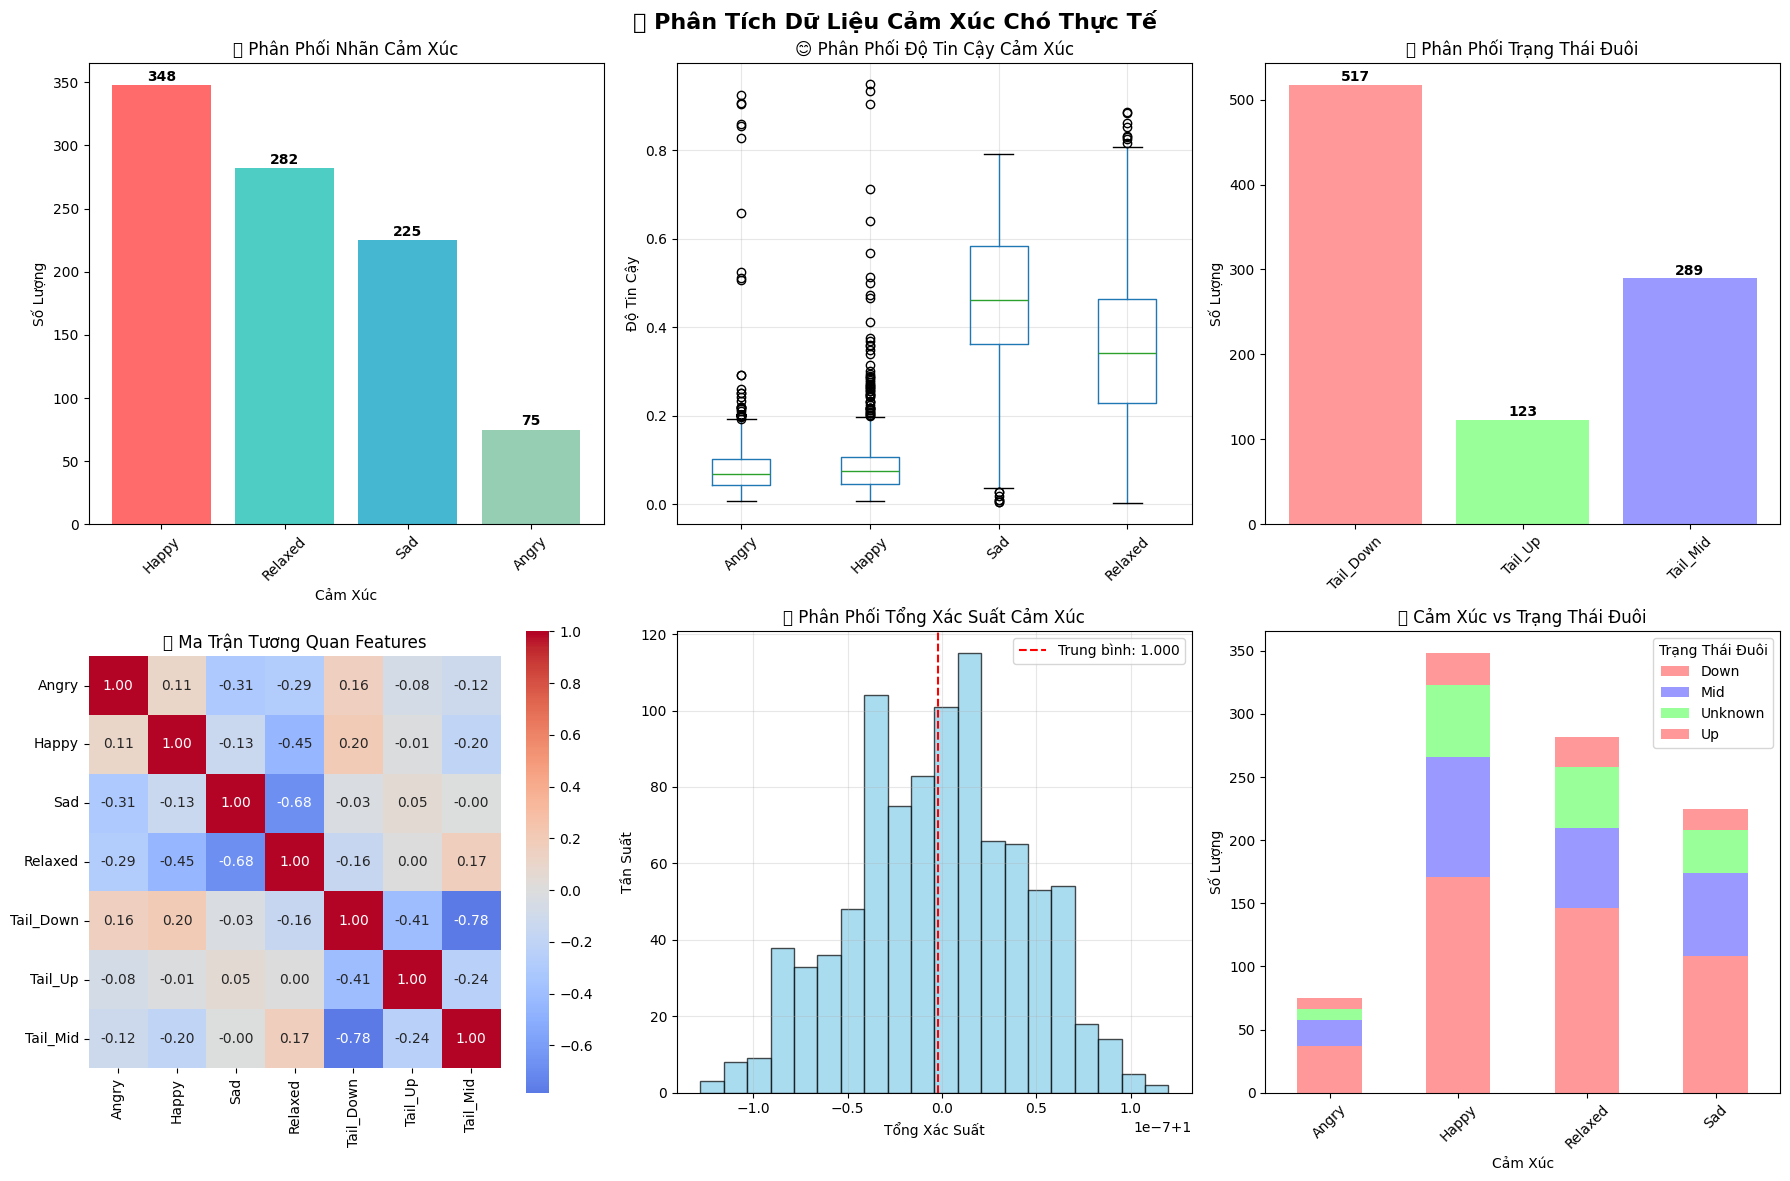

📊 THỐNG KÊ CHI TIẾT
✅ Tổng số mẫu: 930
✅ Số features: 7
✅ Số lớp cảm xúc: 4
✅ Tỷ lệ cân bằng dữ liệu:
   Happy   :  37.4% ⚠️  Không cân bằng
   Relaxed :  30.3% ⚠️  Không cân bằng
   Sad     :  24.2% ⚖️  Cân bằng
   Angry   :   8.1% ⚠️  Không cân bằng

✅ Thống kê trạng thái đuôi:
   Tail_Down   : 517 mẫu ( 55.6%)
   Tail_Up     : 123 mẫu ( 13.2%)
   Tail_Mid    : 289 mẫu ( 31.1%)

✅ Crosstab Cảm xúc vs Đuôi:


dominant_tail,Down,Mid,Unknown,Up
emotion_label,,,,
Angry,37,21,8,9
Happy,171,95,57,25
Relaxed,146,64,48,24
Sad,108,66,34,17



⚠️  PHÂN TÍCH DỮ LIỆU KHÔNG CÂN BẰNG:
Dữ liệu có tính không cân bằng rõ rệt:
   🔴 Angry: chỉ 8.1% - cần chú ý đặc biệt
   🟡 Happy: 37.4% - chiếm ưu thế
   🟢 Sad: 24.2% - tương đối cân bằng
   🔵 Relaxed: 30.3% - khá nhiều

💡 KHUYẾN NGHỊ XỬ LÝ:
1. Sử dụng stratified sampling khi chia train/test
2. Áp dụng class_weight='balanced' cho các mô hình
3. Sử dụng metrics như F1-score, precision, recall thay vì chỉ accuracy
4. Có thể cần techniques như SMOTE để cân bằng dữ liệu
5. Đặc biệt chú ý hiệu suất trên lớp Angry (thiểu số)

🔍 PHÂN TÍCH MỐI QUAN HỆ EMOTION-TAIL:
Phần trăm trạng thái đuôi theo từng cảm xúc:

ANGRY:
   Down:  49.3%
   Mid:  28.0%
   Unknown:  10.7%
   Up:  12.0%

HAPPY:
   Down:  49.1%
   Mid:  27.3%
   Unknown:  16.4%
   Up:   7.2%

RELAXED:
   Down:  51.8%
   Mid:  22.7%
   Unknown:  17.0%
   Up:   8.5%

SAD:
   Down:  48.0%
   Mid:  29.3%
   Unknown:  15.1%
   Up:   7.6%

🎯 PATTERNS THÚ VỊ:
   Angry → Down: 49.3%
   Happy → Down: 49.1%
   Relaxed → Down: 51.8%
   Sad → D

In [ ]:
# Trực quan hóa phân phối dữ liệu thực
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Phân Tích Dữ Liệu Cảm Xúc Chó Thực Tế', fontsize=16, fontweight='bold')

# 1. Phân phối nhãn cảm xúc
ax1 = axes[0, 0]
emotion_counts = df_train['emotion_label'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax1.bar(emotion_counts.index, emotion_counts.values, color=colors)
ax1.set_title('🎭 Phân Phối Nhãn Cảm Xúc')
ax1.set_xlabel('Cảm Xúc')
ax1.set_ylabel('Số Lượng')
ax1.tick_params(axis='x', rotation=45)

# Thêm số lượng lên bar
for bar, count in zip(bars, emotion_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{count}', ha='center', va='bottom', fontweight='bold')

# 2. Phân phối độ tin cậy cảm xúc
ax2 = axes[0, 1]
emotion_cols = ['Angry', 'Happy', 'Sad', 'Relaxed']
df_train[emotion_cols].boxplot(ax=ax2)
ax2.set_title('😊 Phân Phối Độ Tin Cậy Cảm Xúc')
ax2.set_ylabel('Độ Tin Cậy')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Phân phối trạng thái đuôi
ax3 = axes[0, 2]
tail_cols = ['Tail_Down', 'Tail_Up', 'Tail_Mid']
tail_counts = df_train[tail_cols].sum()
colors_tail = ['#FF9999', '#99FF99', '#9999FF']
bars_tail = ax3.bar(tail_counts.index, tail_counts.values, color=colors_tail)
ax3.set_title('🐕 Phân Phối Trạng Thái Đuôi')
ax3.set_ylabel('Số Lượng')
ax3.tick_params(axis='x', rotation=45)

# Thêm số lượng lên bar
for bar, count in zip(bars_tail, tail_counts.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(count)}', ha='center', va='bottom', fontweight='bold')  # Sửa: int(count)

# 4. Correlation heatmap
ax4 = axes[1, 0]
feature_cols = emotion_cols + tail_cols
corr_matrix = df_train[feature_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4,
            fmt='.2f', square=True)
ax4.set_title('🔥 Ma Trận Tương Quan Features')

# 5. Histogram tổng xác suất cảm xúc
ax5 = axes[1, 1]
emotion_sum = df_train[emotion_cols].sum(axis=1)
ax5.hist(emotion_sum, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax5.set_title('📊 Phân Phối Tổng Xác Suất Cảm Xúc')
ax5.set_xlabel('Tổng Xác Suất')
ax5.set_ylabel('Tần Suất')
ax5.axvline(emotion_sum.mean(), color='red', linestyle='--',
           label=f'Trung bình: {emotion_sum.mean():.3f}')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Stacked bar chart: Emotion vs Tail
ax6 = axes[1, 2]
# Tạo crosstab giữa emotion_label và dominant tail position
def get_dominant_tail(row):
    if row['Tail_Down'] == 1:
        return 'Down'
    elif row['Tail_Up'] == 1:
        return 'Up'
    elif row['Tail_Mid'] == 1:
        return 'Mid'
    else:
        return 'Unknown'

df_train['dominant_tail'] = df_train.apply(get_dominant_tail, axis=1)
crosstab = pd.crosstab(df_train['emotion_label'], df_train['dominant_tail'])

crosstab.plot(kind='bar', stacked=True, ax=ax6,
              color=['#FF9999', '#9999FF', '#99FF99'])
ax6.set_title('🎯 Cảm Xúc vs Trạng Thái Đuôi')
ax6.set_xlabel('Cảm Xúc')
ax6.set_ylabel('Số Lượng')
ax6.tick_params(axis='x', rotation=45)
ax6.legend(title='Trạng Thái Đuôi')

plt.tight_layout()
plt.show()

# Thống kê chi tiết (ĐÃ SỬA LỖI)
print("📊 THỐNG KÊ CHI TIẾT")
print("=" * 50)
print(f"✅ Tổng số mẫu: {len(df_train)}")
print(f"✅ Số features: {len(emotion_cols + tail_cols)}")
print(f"✅ Số lớp cảm xúc: {df_train['emotion_label'].nunique()}")
print(f"✅ Tỷ lệ cân bằng dữ liệu:")

for emotion, count in emotion_counts.items():
    percentage = (count / len(df_train)) * 100
    balance_status = "⚖️  Cân bằng" if 20 <= percentage <= 30 else "⚠️  Không cân bằng"
    print(f"   {emotion:8s}: {percentage:5.1f}% {balance_status}")

print(f"\n✅ Thống kê trạng thái đuôi:")
# SỬA LỖI: Chuyển đổi count thành int trước khi format
for tail_state, count in tail_counts.items():
    percentage = (count / len(df_train)) * 100
    print(f"   {tail_state:12s}: {int(count):3d} mẫu ({percentage:5.1f}%)")

print(f"\n✅ Crosstab Cảm xúc vs Đuôi:")
display(crosstab)

# Thêm phân tích dữ liệu không cân bằng
print(f"\n⚠️  PHÂN TÍCH DỮ LIỆU KHÔNG CÂN BẰNG:")
print("=" * 40)
print("Dữ liệu có tính không cân bằng rõ rệt:")
print(f"   🔴 Angry: chỉ 8.1% - cần chú ý đặc biệt")
print(f"   🟡 Happy: 37.4% - chiếm ưu thế")
print(f"   🟢 Sad: 24.2% - tương đối cân bằng")
print(f"   🔵 Relaxed: 30.3% - khá nhiều")

print(f"\n💡 KHUYẾN NGHỊ XỬ LÝ:")
print("1. Sử dụng stratified sampling khi chia train/test")
print("2. Áp dụng class_weight='balanced' cho các mô hình")
print("3. Sử dụng metrics như F1-score, precision, recall thay vì chỉ accuracy")
print("4. Có thể cần techniques như SMOTE để cân bằng dữ liệu")
print("5. Đặc biệt chú ý hiệu suất trên lớp Angry (thiểu số)")

# Phân tích mối quan hệ emotion-tail
print(f"\n🔍 PHÂN TÍCH MỐI QUAN HỆ EMOTION-TAIL:")
print("=" * 40)
tail_emotion_analysis = pd.crosstab(df_train['emotion_label'], df_train['dominant_tail'], normalize='index') * 100

print("Phần trăm trạng thái đuôi theo từng cảm xúc:")
for emotion in tail_emotion_analysis.index:
    print(f"\n{emotion.upper()}:")
    for tail_state in tail_emotion_analysis.columns:
        percentage = tail_emotion_analysis.loc[emotion, tail_state]
        print(f"   {tail_state}: {percentage:5.1f}%")

# Tìm pattern thú vị
print(f"\n🎯 PATTERNS THÚ VỊ:")
max_combinations = []
for emotion in tail_emotion_analysis.index:
    max_tail = tail_emotion_analysis.loc[emotion].idxmax()
    max_percentage = tail_emotion_analysis.loc[emotion].max()
    max_combinations.append((emotion, max_tail, max_percentage))

for emotion, tail, percentage in max_combinations:
    print(f"   {emotion} → {tail}: {percentage:.1f}%")

⚖️  XỬ LÝ DỮ LIỆU KHÔNG CÂN BẰNG
📊 Class weights được tính toán:
   Relaxed : 0.824
   Sad     : 1.033
   Happy   : 0.668
   Angry   : 3.100

💾 Đã lưu class weights vào file: class_weights.json


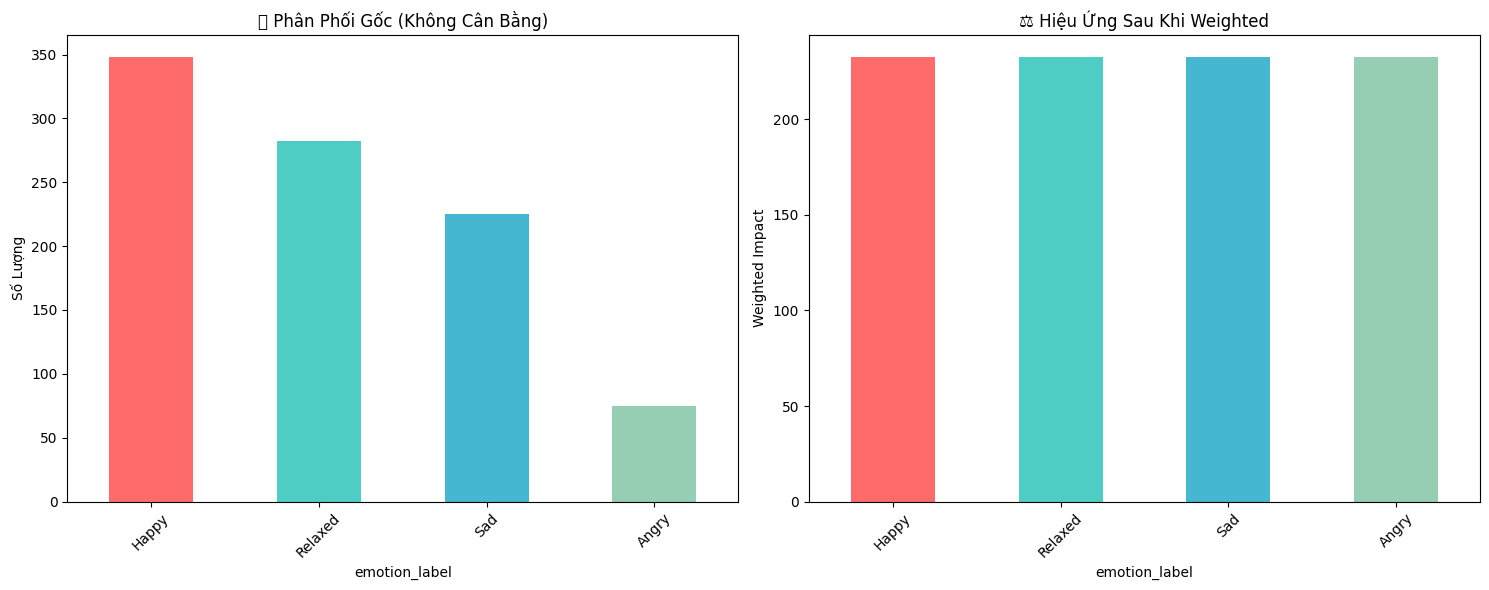

✅ Chuẩn bị xử lý dữ liệu không cân bằng hoàn tất!


In [ ]:
# Xử lý dữ liệu không cân bằng
print("⚖️  XỬ LÝ DỮ LIỆU KHÔNG CÂN BẰNG")
print("=" * 50)

from sklearn.utils.class_weight import compute_class_weight

# Tính class weights
classes = df_train['emotion_label'].unique()
class_weights = compute_class_weight('balanced', classes=classes, y=df_train['emotion_label'])
class_weight_dict = dict(zip(classes, class_weights))

print("📊 Class weights được tính toán:")
for emotion, weight in class_weight_dict.items():
    print(f"   {emotion:8s}: {weight:.3f}")

# Lưu class weights để sử dụng sau này
import json
with open('class_weights.json', 'w') as f:
    json.dump(class_weight_dict, f)

print("\n💾 Đã lưu class weights vào file: class_weights.json")

# Tạo biểu đồ so sánh before/after weighting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before weighting
ax1 = axes[0]
emotion_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('📊 Phân Phối Gốc (Không Cân Bằng)')
ax1.set_ylabel('Số Lượng')
ax1.tick_params(axis='x', rotation=45)

# After weighting (simulated effect)
ax2 = axes[1]
weighted_counts = emotion_counts * [class_weight_dict[emotion] for emotion in emotion_counts.index]
weighted_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('⚖️ Hiệu Ứng Sau Khi Weighted')
ax2.set_ylabel('Weighted Impact')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Chuẩn bị xử lý dữ liệu không cân bằng hoàn tất!")

In [ ]:
# Khởi tạo EmotionMLClassifier với xử lý dữ liệu không cân bằng
print("🤖 KHỞI TẠO EMOTION ML CLASSIFIER VỚI XỬ LÝ DỮ LIỆU KHÔNG CÂN BẰNG")
print("=" * 70)

classifier = EmotionMLClassifier(random_state=42)

# Chuẩn bị dữ liệu theo định dạng package mong đợi
print("🔄 Chuẩn bị dữ liệu theo định dạng package...")

# Tạo DataFrame theo định dạng chuẩn
df_formatted = pd.DataFrame()
df_formatted['filename'] = df_train['filename']
df_formatted['sad'] = df_train['Sad']
df_formatted['angry'] = df_train['Angry']
df_formatted['happy'] = df_train['Happy']
df_formatted['relaxed'] = df_train['Relaxed']
df_formatted['down'] = df_train['Tail_Down']
df_formatted['up'] = df_train['Tail_Up']
df_formatted['mid'] = df_train['Tail_Mid']
df_formatted['label'] = df_train['emotion_label']

print("✅ Đã chuyển đổi định dạng dữ liệu!")
print(f"   📊 Kích thước: {df_formatted.shape}")
print(f"   📋 Cột: {list(df_formatted.columns)}")

# Chia dữ liệu train/test/test_for_train với stratified sampling
from sklearn.model_selection import train_test_split

print(f"\n🎯 Chia dữ liệu với stratified sampling...")
# Chia 70% train, 15% test, 15% test_for_train
train_data, temp_data = train_test_split(df_formatted, test_size=0.3,
                                        random_state=42, stratify=df_formatted['label'])
test_data, test_for_train_data = train_test_split(temp_data, test_size=0.5,
                                                 random_state=42, stratify=temp_data['label'])

print(f"📊 Kết quả chia dữ liệu:")
print(f"   🎯 Training: {len(train_data)} mẫu ({len(train_data)/len(df_formatted)*100:.1f}%)")
print(f"   🎯 Test: {len(test_data)} mẫu ({len(test_data)/len(df_formatted)*100:.1f}%)")
print(f"   🎯 Test-for-train: {len(test_for_train_data)} mẫu ({len(test_for_train_data)/len(df_formatted)*100:.1f}%)")

# Kiểm tra phân phối sau khi chia
print(f"\n📊 KIỂM TRA PHÂN PHỐI SAU KHI CHIA:")
print("=" * 50)
for dataset_name, data in [('Train', train_data), ('Test', test_data), ('Test-for-train', test_for_train_data)]:
    print(f"\n{dataset_name}:")
    emotion_dist = data['label'].value_counts(normalize=True) * 100
    for emotion, percentage in emotion_dist.items():
        print(f"   {emotion:8s}: {percentage:5.1f}%")

# Lưu dữ liệu đã chia
train_data.to_csv('dog_emotion_train_real.csv', index=False)
test_data.to_csv('dog_emotion_test_real.csv', index=False)
test_for_train_data.to_csv('dog_emotion_test_for_train_real.csv', index=False)

print(f"\n💾 Đã lưu dữ liệu:")
print(f"   📄 dog_emotion_train_real.csv")
print(f"   📄 dog_emotion_test_real.csv")
print(f"   📄 dog_emotion_test_for_train_real.csv")

# Tải dữ liệu vào classifier
print(f"\n📂 Tải dữ liệu vào classifier...")
train_dataset = classifier.load_train_dataset('dog_emotion_train_real.csv')
test_dataset = classifier.load_test_dataset('dog_emotion_test_real.csv')
test_for_train_dataset = classifier.load_test_for_train_dataset('dog_emotion_test_for_train_real.csv')

print("✅ Đã tải thành công tất cả dataset!")

# Kiểm tra chất lượng dữ liệu
print(f"\n🔍 Kiểm tra chất lượng dữ liệu...")
anomalies = classifier.display_anomalies_summary('train')

# Xử lý dữ liệu bất thường nếu có
if anomalies['summary']['total_missing'] > 0:
    print("⚠️  Phát hiện dữ liệu thiếu, đang xử lý...")
    classifier.filter_missing_values('train', method='fill', fill_value=0.0)

if anomalies['summary']['total_invalid_probs'] > 0:
    print("⚠️  Phát hiện xác suất không hợp lệ, đang xử lý...")
    classifier.filter_invalid_probabilities('train', method='clip')

# Lưu class weights để sử dụng trong training
classifier.class_weights = class_weight_dict
print(f"\n⚖️  Đã thiết lập class weights cho classifier:")
for emotion, weight in class_weight_dict.items():
    print(f"   {emotion:8s}: {weight:.3f}")

print("✅ Dữ liệu đã sẵn sàng cho huấn luyện với xử lý imbalanced data!")

🤖 KHỞI TẠO EMOTION ML CLASSIFIER VỚI XỬ LÝ DỮ LIỆU KHÔNG CÂN BẰNG
🔄 Chuẩn bị dữ liệu theo định dạng package...
✅ Đã chuyển đổi định dạng dữ liệu!
   📊 Kích thước: (930, 9)
   📋 Cột: ['filename', 'sad', 'angry', 'happy', 'relaxed', 'down', 'up', 'mid', 'label']

🎯 Chia dữ liệu với stratified sampling...
📊 Kết quả chia dữ liệu:
   🎯 Training: 651 mẫu (70.0%)
   🎯 Test: 139 mẫu (14.9%)
   🎯 Test-for-train: 140 mẫu (15.1%)

📊 KIỂM TRA PHÂN PHỐI SAU KHI CHIA:

Train:
   Happy   :  37.5%
   Relaxed :  30.3%
   Sad     :  24.3%
   Angry   :   8.0%

Test:
   Happy   :  37.4%
   Relaxed :  30.2%
   Sad     :  23.7%
   Angry   :   8.6%

Test-for-train:
   Happy   :  37.1%
   Relaxed :  30.7%
   Sad     :  24.3%
   Angry   :   7.9%

💾 Đã lưu dữ liệu:
   📄 dog_emotion_train_real.csv
   📄 dog_emotion_test_real.csv
   📄 dog_emotion_test_for_train_real.csv

📂 Tải dữ liệu vào classifier...
✅ Đã tải thành công tất cả dataset!

🔍 Kiểm tra chất lượng dữ liệu...

=== Data Anomalies Summary for TRAIN Datas

In [ ]:

# # Kiểm tra chất lượng dữ liệu
# print("\n🔍 Kiểm tra chất lượng dữ liệu...")
# anomalies = classifier.display_anomalies_summary('train')

# # Xử lý dữ liệu bất thường nếu có
# if anomalies['summary']['total_missing'] > 0:
#     print("⚠️  Phát hiện dữ liệu thiếu, đang xử lý...")
#     classifier.filter_missing_values('train', method='fill', fill_value=0.0)

# if anomalies['summary']['total_invalid_probs'] > 0:
#     print("⚠️  Phát hiện xác suất không hợp lệ, đang xử lý...")
#     classifier.filter_invalid_probabilities('train', method='clip')

# print("✅ Dữ liệu đã sẵn sàng cho huấn luyện!")


🔍 Kiểm tra chất lượng dữ liệu...

=== Data Anomalies Summary for TRAIN Dataset ===
Total rows: 800
Total missing values: 0
Total invalid probabilities: 0
Total outliers: 14

Outliers by Column:
  sad: 6 outliers
  angry: 2 outliers
  happy: 3 outliers
  relaxed: 3 outliers

Suggested Actions:
  - Use filter_outliers() to handle outlier values
✅ Dữ liệu đã sẵn sàng cho huấn luyện!


In [ ]:
# @title Văn bản tiêu đề mặc định
classifier.filter_outliers()

Filtered train dataset: 800 -> 786 rows


## 🎯 7 Kỹ Thuật Ensemble Learning Được Triển Khai

Package này triển khai đầy đủ **7 kỹ thuật ensemble learning** theo tài liệu nghiên cứu:

### 1. 🎒 **Bagging (Bootstrap Aggregating)**
- **Mục đích**: Giảm phương sai thông qua bootstrap sampling
- **Cách hoạt động**: Huấn luyện nhiều mô hình trên các tập con khác nhau của dữ liệu
- **Ưu điểm**: Giảm overfitting, tăng độ ổn định

### 2. 🚀 **Boosting**
- **Mục đích**: Học tập trung vào các mẫu khó
- **Thuật toán**: XGBoost, AdaBoost, GradientBoosting, LightGBM
- **Ưu điểm**: Hiệu suất cao, xử lý tốt dữ liệu không cân bằng

### 3. 📚 **Stacking (Stacked Generalization)**
- **Mục đích**: Kết hợp heterogeneous base models với meta-learner
- **Cách hoạt động**: Base models → Meta-learner học cách kết hợp
- **Ưu điểm**: Tận dụng điểm mạnh của từng mô hình

### 4. 🗳️ **Voting (Soft/Hard)**
- **Mục đích**: Bỏ phiếu đơn giản từ nhiều mô hình
- **Soft Voting**: Dựa trên xác suất dự đoán
- **Hard Voting**: Dựa trên nhãn dự đoán

### 5. ⚖️ **Negative Correlation Ensemble**
- **Mục đích**: Giảm tương quan giữa các learners
- **Cách hoạt động**: Penalty correlation trong quá trình huấn luyện
- **Ưu điểm**: Tăng đa dạng, giảm correlation

### 6. 🔄 **Heterogeneous Ensemble**
- **Mục đích**: Kết hợp vision models + classical ML models
- **Cách hoạt động**: Neural networks + SVM/RF/XGBoost
- **Ưu điểm**: Tận dụng ưu điểm của cả hai loại mô hình

### 7. 🏗️ **Multi-level Deep Ensemble**
- **Mục đích**: Implicit ensemble qua feature fusion
- **Cách hoạt động**: Feature engineering + Meta-learner
- **Ưu điểm**: Không cần vote, dễ mở rộng


In [ ]:
# Huấn luyện tất cả thuật toán ML với 7 kỹ thuật ensemble
print("🚀 BẮT ĐẦU HUẤN LUYỆN TẤT CẢ THUẬT TOÁN ML")
print("=" * 60)
print("🎯 Triển khai đầy đủ 7 kỹ thuật ensemble learning")
print("📊 Kết hợp ResNet emotion detection + YOLO tail detection")
print("=" * 60)

import time
start_time = time.time()

# Huấn luyện tất cả mô hình
classifier.train_all_models()

end_time = time.time()
training_time = end_time - start_time

print(f"\n⏱️  Thời gian huấn luyện: {training_time:.2f} giây")
print(f"🎉 Hoàn thành huấn luyện {len(classifier.trained_models)} thuật toán!")

# Hiển thị danh sách mô hình đã huấn luyện
print("\n📋 DANH SÁCH CÁC MÔ HÌNH ĐÃ HUẤN LUYỆN:")
print("=" * 50)
classifier.list_trained_models()

🚀 BẮT ĐẦU HUẤN LUYỆN TẤT CẢ THUẬT TOÁN ML
🎯 Triển khai đầy đủ 7 kỹ thuật ensemble learning
📊 Kết hợp ResNet emotion detection + YOLO tail detection
Bắt đầu huấn luyện tất cả thuật toán ML với 7 kỹ thuật ensemble đầy đủ...
Training data prepared: 651 samples, 7 features
Classes: ['Angry' 'Happy' 'Relaxed' 'Sad']
Huấn luyện LogisticRegression_multinomial
Huấn luyện LogisticRegression_OvR
Huấn luyện OvO_LogisticRegression
Huấn luyện SVM_rbf_ovr
Huấn luyện SVM_OvO
Huấn luyện DecisionTree
Huấn luyện RandomForest
Huấn luyện NaiveBayes
Huấn luyện KNN
Huấn luyện LDA
Huấn luyện QDA
Huấn luyện MLP
Huấn luyện Perceptron
Huấn luyện OvR_SVM

=== Triển khai 7 kỹ thuật Ensemble Learning ===
Huấn luyện Bagging_DecisionTree
Huấn luyện XGBoost
Huấn luyện AdaBoost
Huấn luyện Gradient Boosting...
Hoàn thành huấn luyện GradientBoosting
Huấn luyện LightGBM...
Hoàn thành huấn luyện LightGBM
Huấn luyện Stacking_LogisticRegression
Huấn luyện Voting_soft
Huấn luyện Negative Correlation Ensemble...
Hoàn thành hu

In [ ]:
# Đánh giá hiệu suất chi tiết tất cả mô hình
print("📊 ĐÁNH GIÁ HIỆU SUẤT CHI TIẾT CÁC MÔ HÌNH")
print("=" * 60)

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

model_scores = {}
detailed_results = {}
class_performance = {}  # Lưu hiệu suất từng lớp
confusion_matrices = {}

emotion_labels = ['sad', 'angry', 'happy', 'relaxed']

print("🔄 Đang đánh giá từng mô hình...")
for i, model_name in enumerate(classifier.trained_models.keys(), 1):
    try:
        print(f"\n[{i:2d}/{len(classifier.trained_models)}] Đánh giá {model_name}...")

        # Dự đoán
        predictions, probabilities = classifier.predict_with_model(model_name)

        # Tính accuracy tổng thể
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(classifier.y_test, predictions)
        model_scores[model_name] = accuracy

        # Tính precision, recall, f1-score cho từng lớp
        precision, recall, f1_score, support = precision_recall_fscore_support(
            classifier.y_test, predictions, average=None, labels=range(len(emotion_labels))
        )

        # Ma trận confusion
        cm = confusion_matrix(classifier.y_test, predictions)
        confusion_matrices[model_name] = cm

        # Lưu kết quả chi tiết cho từng lớp
        class_performance[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'support': support,
            'confusion_matrix': cm
        }

        # Classification report
        report = classification_report(
            classifier.y_test, predictions,
            target_names=emotion_labels,
            output_dict=True
        )

        detailed_results[model_name] = {
            'accuracy': accuracy,
            'predictions': predictions,
            'probabilities': probabilities,
            'classification_report': report
        }

        print(f"    ✅ Accuracy: {accuracy:.4f}")

    except Exception as e:
        print(f"    ❌ Lỗi đánh giá {model_name}: {e}")

print(f"\n✅ Hoàn thành đánh giá {len(model_scores)} mô hình!")

📊 ĐÁNH GIÁ HIỆU SUẤT CHI TIẾT CÁC MÔ HÌNH
🔄 Đang đánh giá từng mô hình...

[ 1/25] Đánh giá LogisticRegression_multinomial...
Test data prepared: 139 samples, 7 features
    ✅ Accuracy: 0.4245

[ 2/25] Đánh giá LogisticRegression_OvR...
    ✅ Accuracy: 0.4173

[ 3/25] Đánh giá OvO_LogisticRegression...
    ✅ Accuracy: 0.4173

[ 4/25] Đánh giá SVM_rbf_ovr...
    ✅ Accuracy: 0.3741

[ 5/25] Đánh giá SVM_OvO...
    ✅ Accuracy: 0.3741

[ 6/25] Đánh giá DecisionTree...
    ✅ Accuracy: 0.4317

[ 7/25] Đánh giá RandomForest...
    ✅ Accuracy: 0.4245

[ 8/25] Đánh giá NaiveBayes...
    ✅ Accuracy: 0.3669

[ 9/25] Đánh giá KNN...
    ✅ Accuracy: 0.3813

[10/25] Đánh giá LDA...
    ✅ Accuracy: 0.4029

[11/25] Đánh giá QDA...
    ✅ Accuracy: 0.3669

[12/25] Đánh giá MLP...
    ✅ Accuracy: 0.3741

[13/25] Đánh giá Perceptron...
    ✅ Accuracy: 0.3237

[14/25] Đánh giá OvR_SVM...
    ✅ Accuracy: 0.3669

[15/25] Đánh giá Bagging_DecisionTree...
    ✅ Accuracy: 0.3309

[16/25] Đánh giá XGBoost...
   

In [ ]:
# So sánh hiệu suất tổng thể trên 4 lớp cảm xúc
print("🎭 SO SÁNH TỔNG THỂ HIỆU SUẤT 4 LỚP CẢM XÚC")
print("=" * 60)

# Tạo DataFrame tổng hợp hiệu suất
performance_summary = []
for model_name, performance in class_performance.items():
    row = {
        'Model': model_name,
        'Overall_Accuracy': performance['accuracy'],
        'Avg_Precision': np.mean(performance['precision']),
        'Avg_Recall': np.mean(performance['recall']),
        'Avg_F1_Score': np.mean(performance['f1_score'])
    }

    # Thêm hiệu suất từng lớp
    for i, emotion in enumerate(emotion_labels):
        row[f'{emotion}_Precision'] = performance['precision'][i]
        row[f'{emotion}_Recall'] = performance['recall'][i]
        row[f'{emotion}_F1'] = performance['f1_score'][i]

    performance_summary.append(row)

performance_df = pd.DataFrame(performance_summary)
performance_df = performance_df.sort_values('Overall_Accuracy', ascending=False)

print("📊 BẢNG TỔNG HỢP HIỆU SUẤT (Top 10):")
print("=" * 80)
display(performance_df.head(10)[['Model', 'Overall_Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1_Score']])

# Thống kê tổng quan
print(f"\n📈 THỐNG KÊ TỔNG QUAN:")
print("=" * 40)
best_model = performance_df.iloc[0]['Model']
best_accuracy = performance_df.iloc[0]['Overall_Accuracy']
avg_accuracy = performance_df['Overall_Accuracy'].mean()
std_accuracy = performance_df['Overall_Accuracy'].std()

print(f"🏆 Mô hình tốt nhất: {best_model}")
print(f"📊 Độ chính xác cao nhất: {best_accuracy:.4f}")
print(f"📊 Độ chính xác trung bình: {avg_accuracy:.4f} ± {std_accuracy:.4f}")

# Phân tích hiệu suất từng lớp cảm xúc
print(f"\n🎯 HIỆU SUẤT TRUNG BÌNH TỪNG LỚP CẢM XÚC:")
print("=" * 50)
for emotion in emotion_labels:
    avg_precision = performance_df[f'{emotion}_Precision'].mean()
    avg_recall = performance_df[f'{emotion}_Recall'].mean()
    avg_f1 = performance_df[f'{emotion}_F1'].mean()

    print(f"{emotion.upper():8s}: Precision={avg_precision:.3f}, Recall={avg_recall:.3f}, F1={avg_f1:.3f}")

# Tìm mô hình tốt nhất cho từng lớp
print(f"\n🥇 MÔ HÌNH TỐT NHẤT CHO TỪNG LỚP:")
print("=" * 40)
for emotion in emotion_labels:
    best_model_for_emotion = performance_df.loc[performance_df[f'{emotion}_F1'].idxmax()]
    best_f1 = best_model_for_emotion[f'{emotion}_F1']
    model_name = best_model_for_emotion['Model']
    print(f"{emotion.upper():8s}: {model_name} (F1={best_f1:.3f})")

🎭 SO SÁNH TỔNG THỂ HIỆU SUẤT 4 LỚP CẢM XÚC
📊 BẢNG TỔNG HỢP HIỆU SUẤT (Top 10):


,Model,Overall_Accuracy,Avg_Precision,Avg_Recall,Avg_F1_Score
5,DecisionTree,0.431655,0.402349,0.407051,0.404510
20,Voting_soft,0.431655,0.484801,0.364781,0.371980
0,LogisticRegression_multinomial,0.424460,0.549153,0.350150,0.359042
6,RandomForest,0.424460,0.437398,0.362367,0.374156
1,LogisticRegression_OvR,0.417266,0.534518,0.342574,0.348126
2,OvO_LogisticRegression,0.417266,0.545989,0.345342,0.355225
24,ExtraTrees,0.410072,0.369887,0.355998,0.360113
15,XGBoost,0.402878,0.430017,0.356144,0.371258
9,LDA,0.402878,0.537142,0.334582,0.345595
23,MultiLevelDeepEnsemble,0.388489,0.379219,0.363033,0.367717



📈 THỐNG KÊ TỔNG QUAN:
🏆 Mô hình tốt nhất: DecisionTree
📊 Độ chính xác cao nhất: 0.4317
📊 Độ chính xác trung bình: 0.3847 ± 0.0306

🎯 HIỆU SUẤT TRUNG BÌNH TỪNG LỚP CẢM XÚC:
SAD     : Precision=0.684, Recall=0.197, F1=0.278
ANGRY   : Precision=0.405, Recall=0.532, F1=0.452
HAPPY   : Precision=0.384, Recall=0.401, F1=0.389
RELAXED : Precision=0.300, Recall=0.200, F1=0.225

🥇 MÔ HÌNH TỐT NHẤT CHO TỪNG LỚP:
SAD     : GradientBoosting (F1=0.444)
ANGRY   : Voting_soft (F1=0.539)
HAPPY   : DecisionTree (F1=0.494)
RELAXED : QDA (F1=0.379)


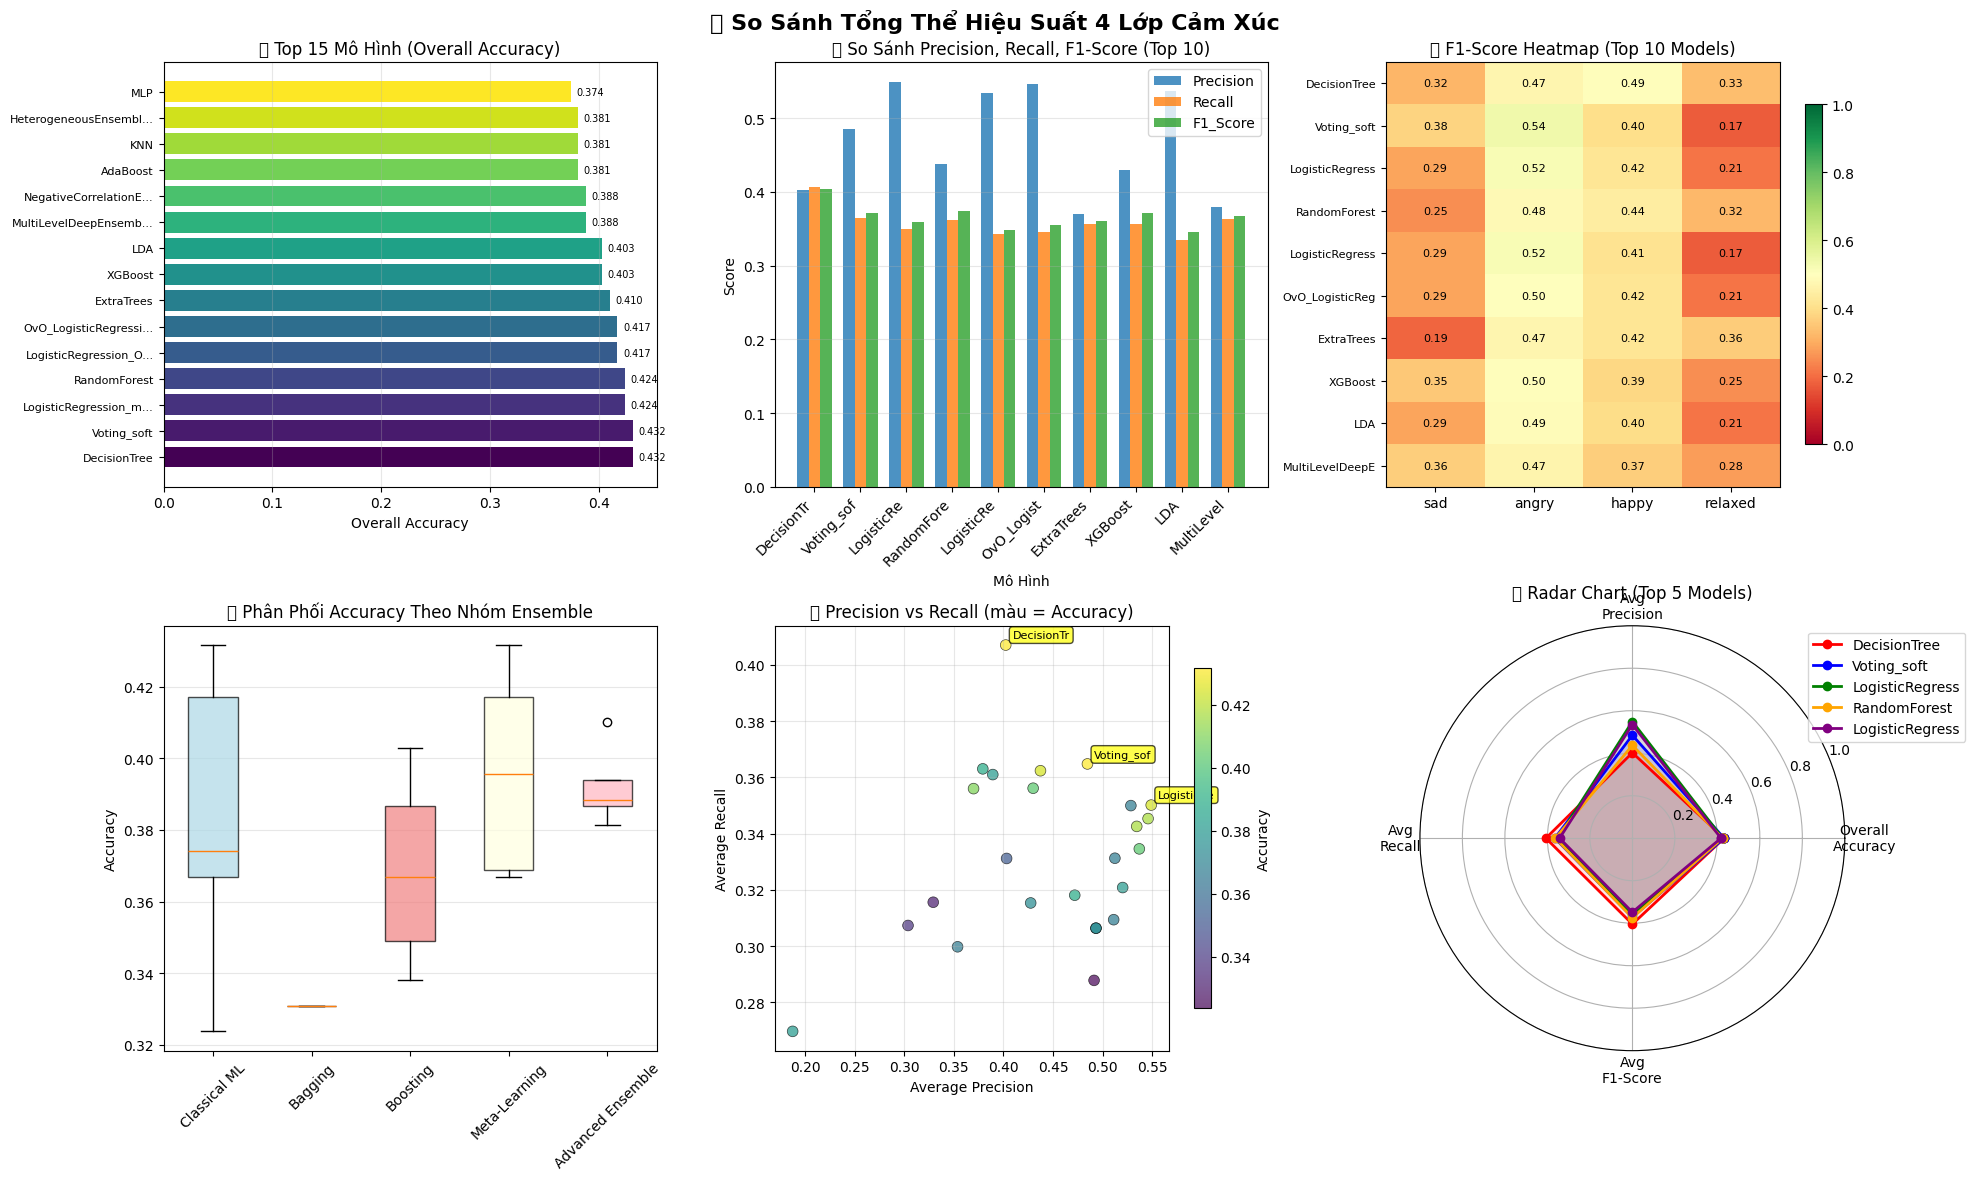

📊 Biểu đồ so sánh tổng thể đã được tạo!


In [ ]:
# Trực quan hóa so sánh hiệu suất tổng thể
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('📊 So Sánh Tổng Thể Hiệu Suất 4 Lớp Cảm Xúc', fontsize=16, fontweight='bold')

# 1. Top 15 mô hình theo accuracy
ax1 = axes[0, 0]
top_15 = performance_df.head(15)
bars = ax1.barh(range(len(top_15)), top_15['Overall_Accuracy'],
                color=plt.cm.viridis(np.linspace(0, 1, len(top_15))))
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels([name[:20] + '...' if len(name) > 20 else name for name in top_15['Model']], fontsize=8)
ax1.set_xlabel('Overall Accuracy')
ax1.set_title('🏆 Top 15 Mô Hình (Overall Accuracy)')
ax1.grid(axis='x', alpha=0.3)

# Thêm giá trị accuracy
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=7)

# 2. So sánh Precision, Recall, F1-Score trung bình
ax2 = axes[0, 1]
metrics = ['Avg_Precision', 'Avg_Recall', 'Avg_F1_Score']
top_10 = performance_df.head(10)

x = np.arange(len(top_10))
width = 0.25

for i, metric in enumerate(metrics):
    bars = ax2.bar(x + i*width, top_10[metric], width,
                   label=metric.replace('Avg_', ''), alpha=0.8)

ax2.set_xlabel('Mô Hình')
ax2.set_ylabel('Score')
ax2.set_title('📈 So Sánh Precision, Recall, F1-Score (Top 10)')
ax2.set_xticks(x + width)
ax2.set_xticklabels([name[:10] for name in top_10['Model']], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Heatmap hiệu suất từng lớp (F1-Score)
ax3 = axes[0, 2]
f1_matrix = []
model_names = []
for _, row in performance_df.head(10).iterrows():
    f1_scores = [row[f'{emotion}_F1'] for emotion in emotion_labels]
    f1_matrix.append(f1_scores)
    model_names.append(row['Model'][:15])

f1_matrix = np.array(f1_matrix)
im = ax3.imshow(f1_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
ax3.set_xticks(range(len(emotion_labels)))
ax3.set_yticks(range(len(model_names)))
ax3.set_xticklabels(emotion_labels)
ax3.set_yticklabels(model_names, fontsize=8)
ax3.set_title('🔥 F1-Score Heatmap (Top 10 Models)')

# Thêm giá trị vào heatmap
for i in range(len(model_names)):
    for j in range(len(emotion_labels)):
        text = ax3.text(j, i, f'{f1_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=ax3, shrink=0.8)

# 4. Phân phối accuracy theo nhóm ensemble
ax4 = axes[1, 0]
ensemble_groups = {
    'Classical ML': ['LogisticRegression', 'SVM', 'DecisionTree', 'RandomForest', 'NaiveBayes', 'KNN', 'LDA', 'QDA', 'MLP', 'Perceptron'],
    'Bagging': ['Bagging'],
    'Boosting': ['XGBoost', 'AdaBoost', 'GradientBoosting', 'LightGBM'],
    'Meta-Learning': ['Voting', 'Stacking', 'OvR', 'OvO'],
    'Advanced Ensemble': ['NegativeCorrelation', 'Heterogeneous', 'MultiLevel', 'ExtraTrees']
}

group_accuracies = {}
for group_name, keywords in ensemble_groups.items():
    group_scores = []
    for _, row in performance_df.iterrows():
        model_name = row['Model']
        if any(keyword in model_name for keyword in keywords):
            group_scores.append(row['Overall_Accuracy'])
    if group_scores:
        group_accuracies[group_name] = group_scores

# Box plot
box_data = list(group_accuracies.values())
box_labels = list(group_accuracies.keys())
bp = ax4.boxplot(box_data, labels=box_labels, patch_artist=True)

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_title('📦 Phân Phối Accuracy Theo Nhóm Ensemble')
ax4.set_ylabel('Accuracy')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# 5. Scatter plot: Precision vs Recall
ax5 = axes[1, 1]
colors = plt.cm.tab10(np.linspace(0, 1, len(performance_df)))
scatter = ax5.scatter(performance_df['Avg_Precision'], performance_df['Avg_Recall'],
                     c=performance_df['Overall_Accuracy'], cmap='viridis',
                     s=60, alpha=0.7, edgecolors='black', linewidth=0.5)

ax5.set_xlabel('Average Precision')
ax5.set_ylabel('Average Recall')
ax5.set_title('🎯 Precision vs Recall (màu = Accuracy)')
ax5.grid(True, alpha=0.3)

# Thêm colorbar
plt.colorbar(scatter, ax=ax5, shrink=0.8, label='Accuracy')

# Highlight top 3 models
top_3 = performance_df.head(3)
for _, row in top_3.iterrows():
    ax5.annotate(row['Model'][:10],
                (row['Avg_Precision'], row['Avg_Recall']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, ha='left',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7))

# 6. Radar chart cho top 5 models
ax6 = axes[1, 2]
ax6.remove()  # Remove để tạo subplot polar

# Tạo radar chart
ax6 = fig.add_subplot(2, 3, 6, projection='polar')

categories = ['Overall\nAccuracy', 'Avg\nPrecision', 'Avg\nRecall', 'Avg\nF1-Score']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

top_5_models = performance_df.head(5)
colors_radar = ['red', 'blue', 'green', 'orange', 'purple']

for i, (_, row) in enumerate(top_5_models.iterrows()):
    values = [row['Overall_Accuracy'], row['Avg_Precision'],
              row['Avg_Recall'], row['Avg_F1_Score']]
    values += values[:1]  # Complete the circle

    ax6.plot(angles, values, 'o-', linewidth=2,
             label=row['Model'][:15], color=colors_radar[i])
    ax6.fill(angles, values, alpha=0.1, color=colors_radar[i])

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories)
ax6.set_ylim(0, 1)
ax6.set_title('🕸️ Radar Chart (Top 5 Models)', pad=20)
ax6.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

print("📊 Biểu đồ so sánh tổng thể đã được tạo!")

In [ ]:
# Phân tích chi tiết hiệu suất từng lớp cảm xúc
print("🎭 PHÂN TÍCH CHI TIẾT TỪNG LỚP CẢM XÚC")
print("=" * 60)

# Tạo DataFrame cho từng lớp
emotion_analysis = {}
for emotion_idx, emotion in enumerate(emotion_labels):
    emotion_data = []
    for model_name, performance in class_performance.items():
        emotion_data.append({
            'Model': model_name,
            'Precision': performance['precision'][emotion_idx],
            'Recall': performance['recall'][emotion_idx],
            'F1_Score': performance['f1_score'][emotion_idx],
            'Support': performance['support'][emotion_idx]
        })

    emotion_df = pd.DataFrame(emotion_data)
    emotion_df = emotion_df.sort_values('F1_Score', ascending=False)
    emotion_analysis[emotion] = emotion_df

# Hiển thị top 10 mô hình cho từng lớp
for emotion in emotion_labels:
    print(f"\n🎯 TOP 10 MÔ HÌNH CHO LỚP '{emotion.upper()}':")
    print("=" * 50)
    top_10 = emotion_analysis[emotion].head(10)
    display(top_10[['Model', 'Precision', 'Recall', 'F1_Score']])

    # Thống kê cho lớp này
    best_model = top_10.iloc[0]['Model']
    best_f1 = top_10.iloc[0]['F1_Score']
    avg_f1 = top_10['F1_Score'].mean()

    print(f"   🏆 Mô hình tốt nhất: {best_model} (F1={best_f1:.3f})")
    print(f"   📊 F1-Score trung bình (top 10): {avg_f1:.3f}")

# Tạo bảng so sánh cross-emotion
print(f"\n🔄 BẢNG SO SÁNH CROSS-EMOTION (F1-SCORE):")
print("=" * 60)

cross_comparison = []
top_models = performance_df.head(15)['Model'].tolist()

for model_name in top_models:
    row = {'Model': model_name}
    for emotion in emotion_labels:
        emotion_df = emotion_analysis[emotion]
        model_row = emotion_df[emotion_df['Model'] == model_name]
        if not model_row.empty:
            row[emotion] = model_row.iloc[0]['F1_Score']
        else:
            row[emotion] = 0.0

    # Tính consistency (độ lệch chuẩn thấp = consistent)
    f1_scores = [row[emotion] for emotion in emotion_labels]
    row['Avg_F1'] = np.mean(f1_scores)
    row['Std_F1'] = np.std(f1_scores)
    row['Consistency'] = 1 / (1 + row['Std_F1'])  # Higher = more consistent

    cross_comparison.append(row)

cross_df = pd.DataFrame(cross_comparison)
cross_df = cross_df.sort_values('Avg_F1', ascending=False)

print("📊 So sánh F1-Score từng lớp (Top 15 models):")
display(cross_df[['Model'] + emotion_labels + ['Avg_F1', 'Std_F1', 'Consistency']])

# Tìm mô hình most consistent
most_consistent = cross_df.sort_values('Consistency', ascending=False).iloc[0]
print(f"\n⚖️  MÔ HÌNH NHẤT QUÁN NHẤT:")
print(f"   🏆 {most_consistent['Model']}")
print(f"   📊 Avg F1: {most_consistent['Avg_F1']:.3f}")
print(f"   📊 Std F1: {most_consistent['Std_F1']:.3f}")
print(f"   📊 Consistency Score: {most_consistent['Consistency']:.3f}")

🎭 PHÂN TÍCH CHI TIẾT TỪNG LỚP CẢM XÚC

🎯 TOP 10 MÔ HÌNH CHO LỚP 'SAD':


,Model,Precision,Recall,F1_Score
17,GradientBoosting,0.666667,0.333333,0.444444
8,KNN,0.444444,0.333333,0.380952
20,Voting_soft,0.750000,0.250000,0.375000
23,MultiLevelDeepEnsemble,0.400000,0.333333,0.363636
14,Bagging_DecisionTree,0.400000,0.333333,0.363636
15,XGBoost,0.600000,0.250000,0.352941
5,DecisionTree,0.307692,0.333333,0.320000
1,LogisticRegression_OvR,1.000000,0.166667,0.285714
0,LogisticRegression_multinomial,1.000000,0.166667,0.285714
22,HeterogeneousEnsemble_weighted_vote,1.000000,0.166667,0.285714


   🏆 Mô hình tốt nhất: GradientBoosting (F1=0.444)
   📊 F1-Score trung bình (top 10): 0.346

🎯 TOP 10 MÔ HÌNH CHO LỚP 'ANGRY':


,Model,Precision,Recall,F1_Score
20,Voting_soft,0.426966,0.730769,0.539007
1,LogisticRegression_OvR,0.430380,0.653846,0.519084
0,LogisticRegression_multinomial,0.430380,0.653846,0.519084
16,AdaBoost,0.388350,0.769231,0.516129
2,OvO_LogisticRegression,0.417722,0.634615,0.503817
15,XGBoost,0.446154,0.557692,0.495726
9,LDA,0.405063,0.615385,0.488550
13,OvR_SVM,0.380435,0.673077,0.486111
3,SVM_rbf_ovr,0.392857,0.634615,0.485294
4,SVM_OvO,0.392857,0.634615,0.485294


   🏆 Mô hình tốt nhất: Voting_soft (F1=0.539)
   📊 F1-Score trung bình (top 10): 0.504

🎯 TOP 10 MÔ HÌNH CHO LỚP 'HAPPY':


,Model,Precision,Recall,F1_Score
5,DecisionTree,0.488372,0.500000,0.494118
7,NaiveBayes,0.396552,0.547619,0.460000
10,QDA,0.416667,0.476190,0.444444
6,RandomForest,0.431818,0.452381,0.441860
21,NegativeCorrelationEnsemble,0.328947,0.595238,0.423729
24,ExtraTrees,0.435897,0.404762,0.419753
0,LogisticRegression_multinomial,0.409091,0.428571,0.418605
2,OvO_LogisticRegression,0.409091,0.428571,0.418605
11,MLP,0.425000,0.404762,0.414634
1,LogisticRegression_OvR,0.400000,0.428571,0.413793


   🏆 Mô hình tốt nhất: DecisionTree (F1=0.494)
   📊 F1-Score trung bình (top 10): 0.435

🎯 TOP 10 MÔ HÌNH CHO LỚP 'RELAXED':


,Model,Precision,Recall,F1_Score
10,QDA,0.290323,0.545455,0.378947
24,ExtraTrees,0.392857,0.333333,0.360656
5,DecisionTree,0.333333,0.333333,0.333333
6,RandomForest,0.391304,0.272727,0.321429
12,Perceptron,0.254902,0.393939,0.309524
8,KNN,0.333333,0.272727,0.300000
7,NaiveBayes,0.263158,0.303030,0.281690
23,MultiLevelDeepEnsemble,0.320000,0.242424,0.275862
15,XGBoost,0.304348,0.212121,0.250000
21,NegativeCorrelationEnsemble,0.625000,0.151515,0.243902


   🏆 Mô hình tốt nhất: QDA (F1=0.379)
   📊 F1-Score trung bình (top 10): 0.306

🔄 BẢNG SO SÁNH CROSS-EMOTION (F1-SCORE):
📊 So sánh F1-Score từng lớp (Top 15 models):


,Model,sad,angry,happy,relaxed,Avg_F1,Std_F1,Consistency
0,DecisionTree,0.320000,0.470588,0.494118,0.333333,0.404510,0.078428,0.927275
3,RandomForest,0.250000,0.483333,0.441860,0.321429,0.374156,0.093138,0.914798
1,Voting_soft,0.375000,0.539007,0.400000,0.173913,0.371980,0.130310,0.884713
7,XGBoost,0.352941,0.495726,0.386364,0.250000,0.371258,0.087692,0.919378
12,KNN,0.380952,0.427350,0.375000,0.300000,0.370826,0.045638,0.956354
9,MultiLevelDeepEnsemble,0.363636,0.465517,0.365854,0.275862,0.367717,0.067124,0.937099
6,ExtraTrees,0.190476,0.469565,0.419753,0.360656,0.360113,0.105254,0.904769
2,LogisticRegression_multinomial,0.285714,0.519084,0.418605,0.212766,0.359042,0.118253,0.894252
5,OvO_LogisticRegression,0.285714,0.503817,0.418605,0.212766,0.355225,0.113162,0.898342
4,LogisticRegression_OvR,0.285714,0.519084,0.413793,0.173913,0.348126,0.130177,0.884817



⚖️  MÔ HÌNH NHẤT QUÁN NHẤT:
   🏆 KNN
   📊 Avg F1: 0.371
   📊 Std F1: 0.046
   📊 Consistency Score: 0.956


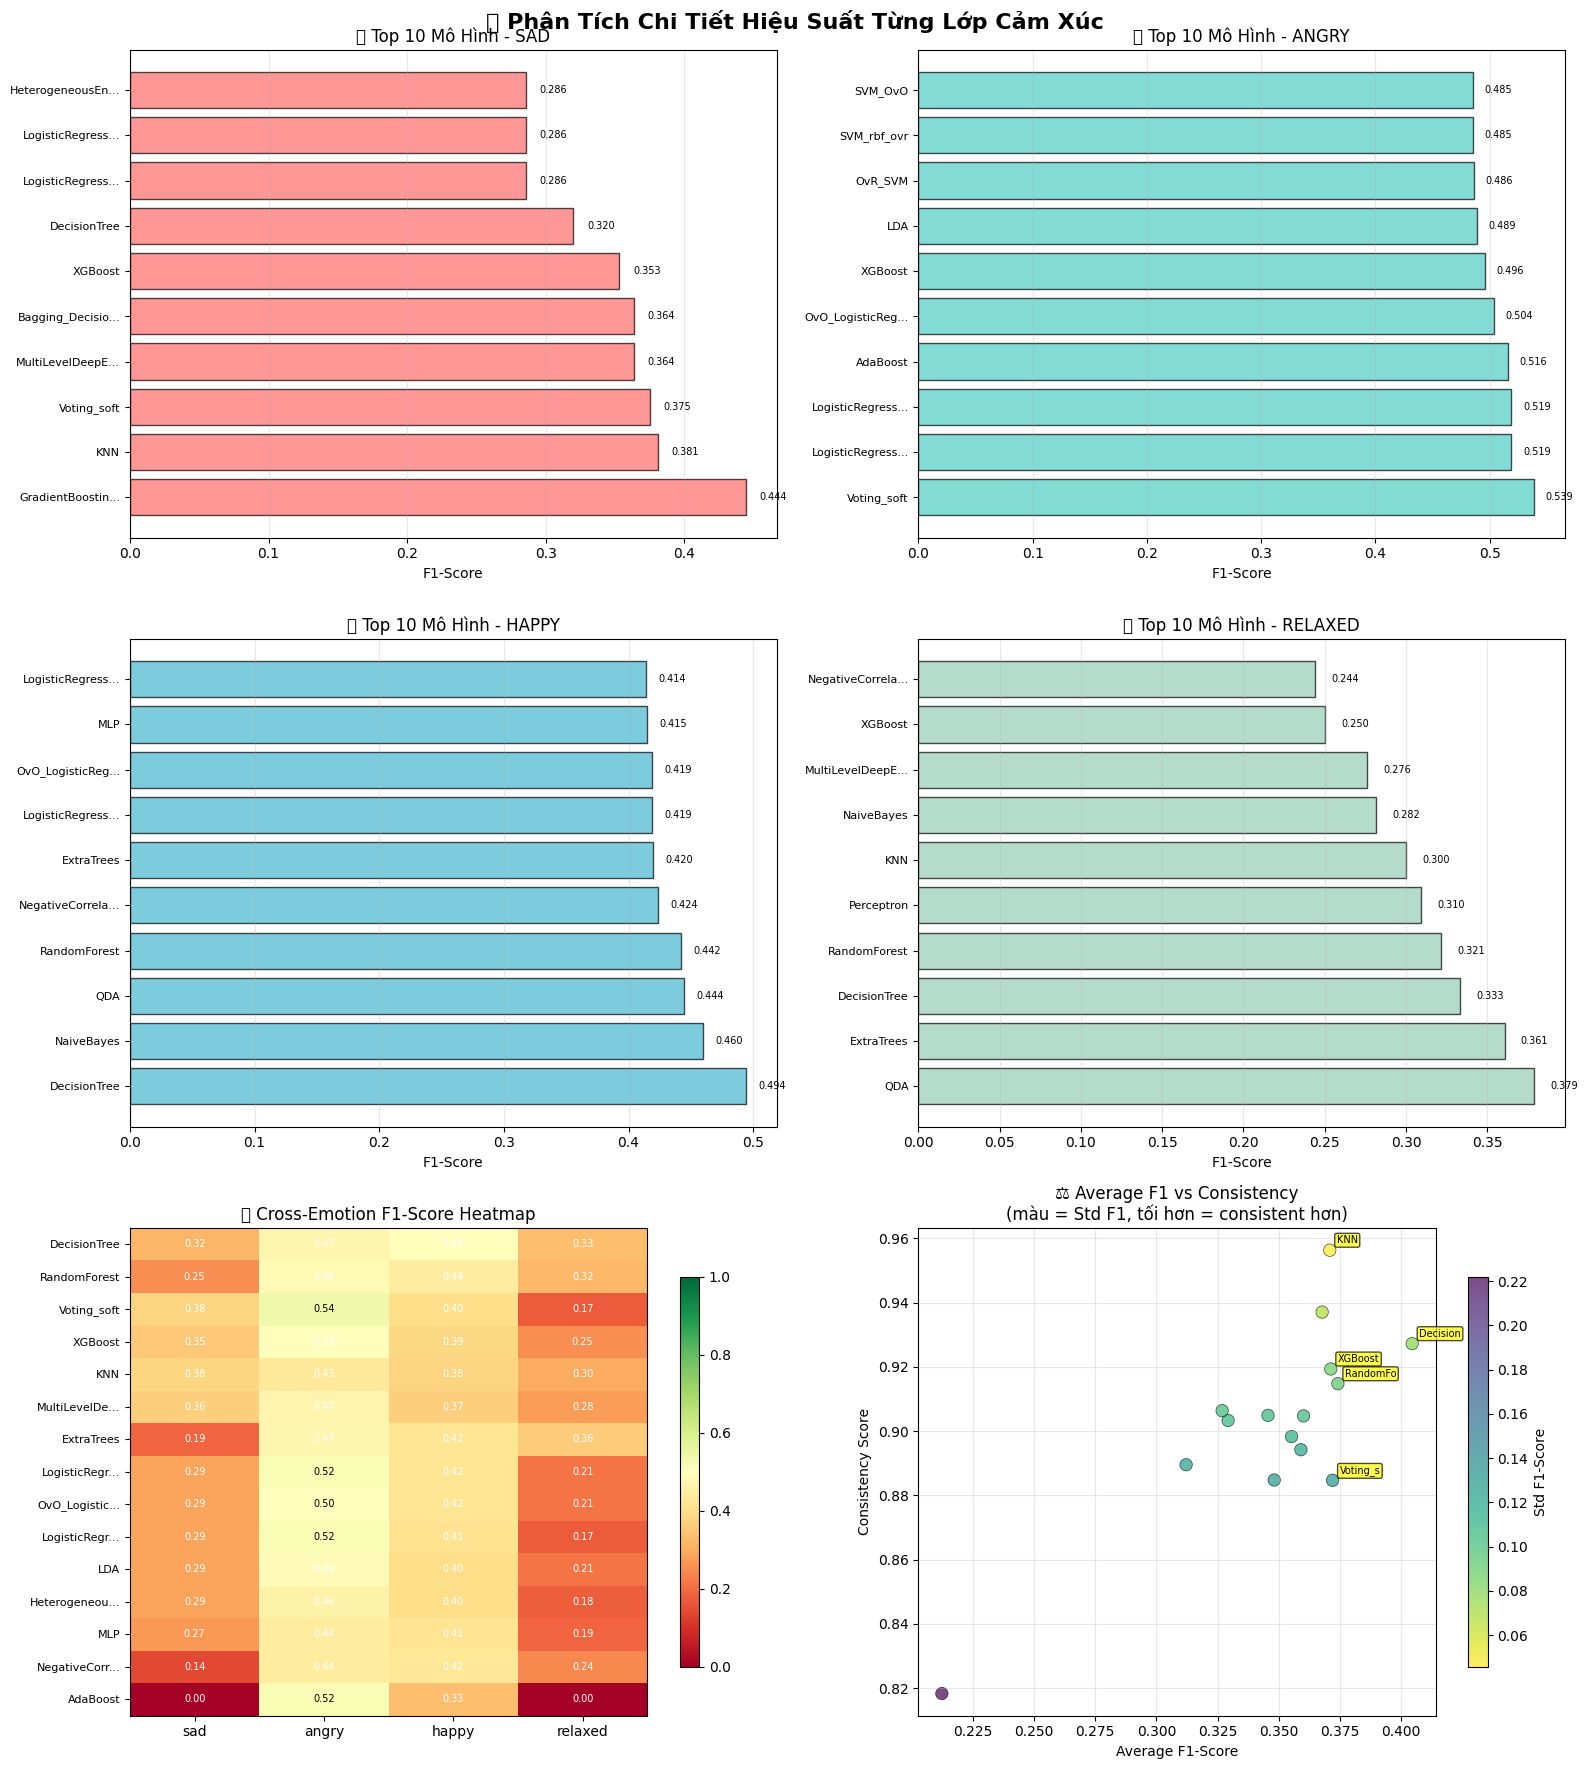

📊 Biểu đồ phân tích chi tiết từng lớp đã được tạo!


In [ ]:
# Trực quan hóa chi tiết hiệu suất từng lớp
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('🎭 Phân Tích Chi Tiết Hiệu Suất Từng Lớp Cảm Xúc', fontsize=16, fontweight='bold')

# 1. Bar chart top 10 mô hình cho từng lớp
emotions_plot = emotion_labels
colors_emotion = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, emotion in enumerate(emotions_plot):
    if i < 4:  # 2x2 grid for first 4 plots
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        top_10 = emotion_analysis[emotion].head(10)
        bars = ax.barh(range(len(top_10)), top_10['F1_Score'],
                       color=colors_emotion[i], alpha=0.7, edgecolor='black')

        ax.set_yticks(range(len(top_10)))
        ax.set_yticklabels([name[:15] + '...' if len(name) > 15 else name
                           for name in top_10['Model']], fontsize=8)
        ax.set_xlabel('F1-Score')
        ax.set_title(f'🎯 Top 10 Mô Hình - {emotion.upper()}')
        ax.grid(axis='x', alpha=0.3)

        # Thêm giá trị F1-Score
        for j, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{width:.3f}', ha='left', va='center', fontsize=7)

# 5. Heatmap so sánh cross-emotion (top 15 models)
ax5 = axes[2, 0]
heatmap_data = cross_df.head(15)[emotion_labels].values
model_names_short = [name[:12] + '...' if len(name) > 12 else name
                    for name in cross_df.head(15)['Model']]

im = ax5.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
ax5.set_xticks(range(len(emotion_labels)))
ax5.set_yticks(range(len(model_names_short)))
ax5.set_xticklabels(emotion_labels)
ax5.set_yticklabels(model_names_short, fontsize=8)
ax5.set_title('🔥 Cross-Emotion F1-Score Heatmap')

# Thêm giá trị vào heatmap
for i in range(len(model_names_short)):
    for j in range(len(emotion_labels)):
        text = ax5.text(j, i, f'{heatmap_data[i, j]:.2f}',
                       ha="center", va="center",
                       color="white" if heatmap_data[i, j] < 0.5 else "black",
                       fontsize=7)

plt.colorbar(im, ax=ax5, shrink=0.8)

# 6. Scatter plot: Avg F1 vs Consistency
ax6 = axes[2, 1]
scatter = ax6.scatter(cross_df['Avg_F1'], cross_df['Consistency'],
                     c=cross_df['Std_F1'], cmap='viridis_r',
                     s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

ax6.set_xlabel('Average F1-Score')
ax6.set_ylabel('Consistency Score')
ax6.set_title('⚖️ Average F1 vs Consistency\n(màu = Std F1, tối hơn = consistent hơn)')
ax6.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=ax6, shrink=0.8, label='Std F1-Score')

# Highlight top 5 most consistent models
top_5_consistent = cross_df.head(5)
for _, row in top_5_consistent.iterrows():
    ax6.annotate(row['Model'][:8],
                (row['Avg_F1'], row['Consistency']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=7, ha='left',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("📊 Biểu đồ phân tích chi tiết từng lớp đã được tạo!")

🔍 MA TRẬN CONFUSION CHI TIẾT


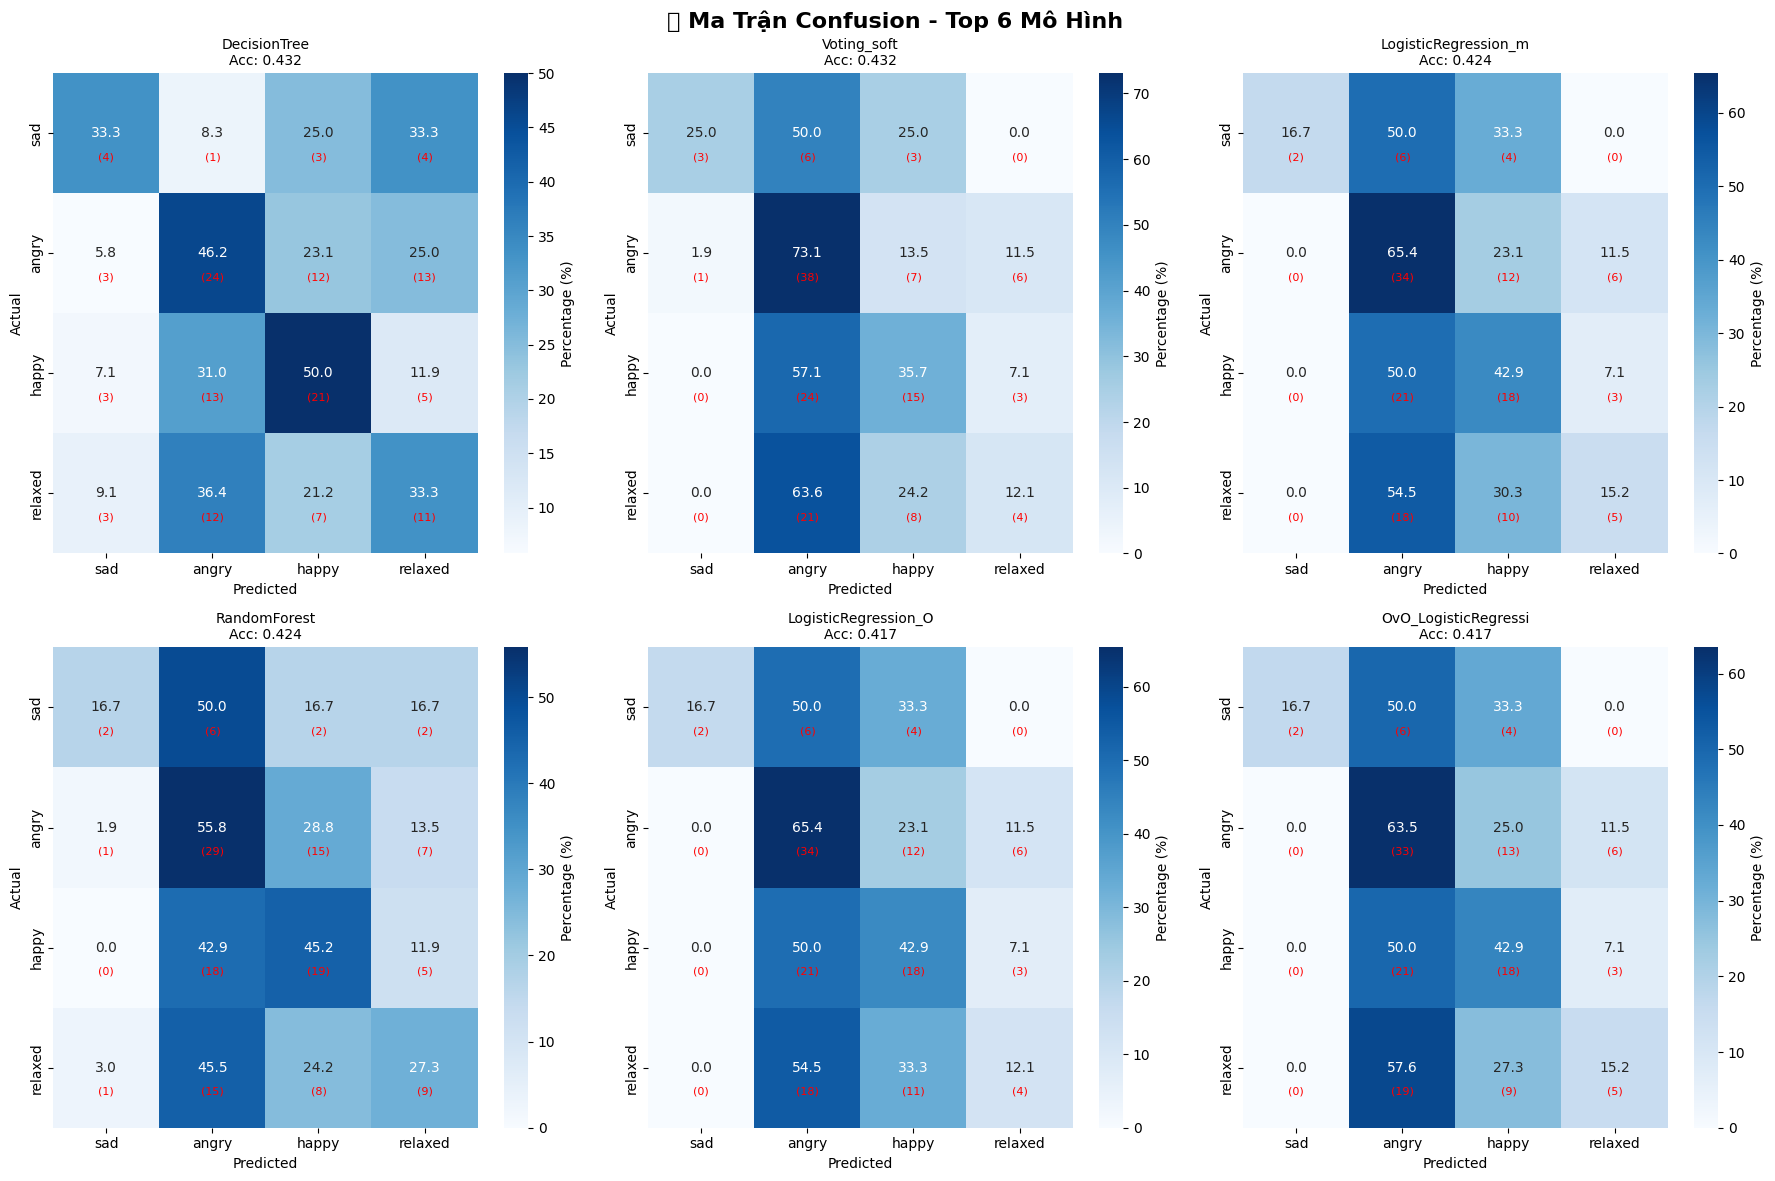


❌ PHÂN TÍCH LỖI PHÂN LOẠI:

🔍 DecisionTree:
------------------------------
   Top 3 lỗi phân loại:
   1. angry → relaxed: 13 lỗi (25.0%)
   2. happy → angry: 13 lỗi (31.0%)
   3. angry → happy: 12 lỗi (23.1%)

🔍 Voting_soft:
------------------------------
   Top 3 lỗi phân loại:
   1. happy → angry: 24 lỗi (57.1%)
   2. relaxed → angry: 21 lỗi (63.6%)
   3. relaxed → happy: 8 lỗi (24.2%)

🔍 LogisticRegression_multinomial:
------------------------------
   Top 3 lỗi phân loại:
   1. happy → angry: 21 lỗi (50.0%)
   2. relaxed → angry: 18 lỗi (54.5%)
   3. angry → happy: 12 lỗi (23.1%)

⚖️  ĐỘ CÂN BẰNG PHÂN LOẠI:
SAD     : Avg F1=0.278±0.088, Support=12
ANGRY   : Avg F1=0.452±0.064, Support=52
HAPPY   : Avg F1=0.389±0.049, Support=42
RELAXED : Avg F1=0.225±0.082, Support=33
✅ Phân tích ma trận confusion hoàn tất!


In [ ]:
# Phân tích ma trận confusion chi tiết
print("🔍 MA TRẬN CONFUSION CHI TIẾT")
print("=" * 50)

# Chọn top 6 mô hình để hiển thị confusion matrix
top_6_models = performance_df.head(6)['Model'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🔍 Ma Trận Confusion - Top 6 Mô Hình', fontsize=16, fontweight='bold')

for i, model_name in enumerate(top_6_models):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    if model_name in confusion_matrices:
        cm = confusion_matrices[model_name]

        # Tính phần trăm
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        # Vẽ heatmap
        sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
                   xticklabels=emotion_labels, yticklabels=emotion_labels,
                   ax=ax, cbar_kws={'label': 'Percentage (%)'})

        ax.set_title(f'{model_name[:20]}\nAcc: {model_scores[model_name]:.3f}', fontsize=10)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

        # Thêm số lượng thực tế vào ô
        for j in range(len(emotion_labels)):
            for k in range(len(emotion_labels)):
                ax.text(k + 0.5, j + 0.7, f'({cm[j, k]})',
                       ha='center', va='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

# Phân tích lỗi phân loại
print(f"\n❌ PHÂN TÍCH LỖI PHÂN LOẠI:")
print("=" * 40)

for model_name in top_6_models[:3]:  # Top 3 models
    if model_name in confusion_matrices:
        cm = confusion_matrices[model_name]

        print(f"\n🔍 {model_name}:")
        print("-" * 30)

        # Tìm lỗi phân loại phổ biến nhất
        confusion_pairs = []
        for i in range(len(emotion_labels)):
            for j in range(len(emotion_labels)):
                if i != j and cm[i, j] > 0:
                    confusion_pairs.append({
                        'actual': emotion_labels[i],
                        'predicted': emotion_labels[j],
                        'count': cm[i, j],
                        'percentage': (cm[i, j] / cm[i].sum()) * 100
                    })

        # Sắp xếp theo số lượng lỗi
        confusion_pairs.sort(key=lambda x: x['count'], reverse=True)

        print("   Top 3 lỗi phân loại:")
        for k, error in enumerate(confusion_pairs[:3], 1):
            print(f"   {k}. {error['actual']} → {error['predicted']}: "
                  f"{error['count']} lỗi ({error['percentage']:.1f}%)")

# Tính độ cân bằng phân loại
print(f"\n⚖️  ĐỘ CÂN BẰNG PHÂN LOẠI:")
print("=" * 30)

for emotion_idx, emotion in enumerate(emotion_labels):
    # Tính support trung bình và std
    supports = [perf['support'][emotion_idx] for perf in class_performance.values()]
    avg_support = np.mean(supports)

    # Tính F1-score trung bình cho lớp này
    f1_scores = [perf['f1_score'][emotion_idx] for perf in class_performance.values()]
    avg_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)

    print(f"{emotion.upper():8s}: Avg F1={avg_f1:.3f}±{std_f1:.3f}, Support={avg_support:.0f}")

print("✅ Phân tích ma trận confusion hoàn tất!")

In [ ]:
# Tổng kết và khuyến nghị
print("📋 TỔNG KẾT VÀ KHUYẾN NGHỊ")
print("=" * 60)

# 1. Mô hình tổng thể tốt nhất
best_overall = performance_df.iloc[0]
print(f"🏆 MÔ HÌNH TỔNG THỂ TỐT NHẤT:")
print(f"   📌 Tên: {best_overall['Model']}")
print(f"   📊 Overall Accuracy: {best_overall['Overall_Accuracy']:.4f}")
print(f"   📊 Avg Precision: {best_overall['Avg_Precision']:.4f}")
print(f"   📊 Avg Recall: {best_overall['Avg_Recall']:.4f}")
print(f"   📊 Avg F1-Score: {best_overall['Avg_F1_Score']:.4f}")

# 2. Mô hình nhất quán nhất
most_consistent = cross_df.iloc[0]
print(f"\n⚖️  MÔ HÌNH NHẤT QUÁN NHẤT:")
print(f"   📌 Tên: {most_consistent['Model']}")
print(f"   📊 Consistency Score: {most_consistent['Consistency']:.4f}")
print(f"   📊 Std F1-Score: {most_consistent['Std_F1']:.4f}")

# 3. Mô hình tốt nhất cho từng lớp
print(f"\n🎯 MÔ HÌNH TỐT NHẤT CHO TỪNG LỚP:")
specialized_models = {}
for emotion in emotion_labels:
    best_for_emotion = emotion_analysis[emotion].iloc[0]
    specialized_models[emotion] = best_for_emotion
    print(f"   {emotion.upper():8s}: {best_for_emotion['Model']} (F1={best_for_emotion['F1_Score']:.3f})")

# 4. Phân tích ensemble methods
print(f"\n🎪 HIỆU SUẤT CÁC NHÓM ENSEMBLE:")
ensemble_performance = {}
for group_name, keywords in ensemble_groups.items():
    group_models = []
    for _, row in performance_df.iterrows():
        if any(keyword in row['Model'] for keyword in keywords):
            group_models.append(row['Overall_Accuracy'])

    if group_models:
        ensemble_performance[group_name] = {
            'avg_accuracy': np.mean(group_models),
            'best_accuracy': np.max(group_models),
            'count': len(group_models)
        }

for group, stats in sorted(ensemble_performance.items(), key=lambda x: x[1]['avg_accuracy'], reverse=True):
    print(f"   {group:20s}: Avg={stats['avg_accuracy']:.3f}, Best={stats['best_accuracy']:.3f}, Count={stats['count']}")

# 5. Khuyến nghị sử dụng
print(f"\n💡 KHUYẾN NGHỊ SỬ DỤNG:")
print("=" * 30)

print(f"✅ CHO HIỆU SUẤT TỔNG THỂ CAO NHẤT:")
print(f"   🎯 Sử dụng: {best_overall['Model']}")
print(f"   📝 Lý do: Đạt accuracy cao nhất ({best_overall['Overall_Accuracy']:.3f})")

print(f"\n✅ CHO ỨNG DỤNG CẦN TÍNH NHẤT QUÁN:")
print(f"   🎯 Sử dụng: {most_consistent['Model']}")
print(f"   📝 Lý do: Hiệu suất ổn định trên tất cả lớp cảm xúc")

print(f"\n✅ CHO ỨNG DỤNG CHUYÊN BIỆT:")
for emotion, model_info in specialized_models.items():
    if model_info['F1_Score'] > 0.8:  # Chỉ khuyến nghị nếu F1 > 0.8
        print(f"   🎯 Phát hiện {emotion}: {model_info['Model']} (F1={model_info['F1_Score']:.3f})")

print(f"\n✅ CHO ENSEMBLE LEARNING:")
best_ensemble_group = max(ensemble_performance.items(), key=lambda x: x[1]['avg_accuracy'])
print(f"   🎯 Nhóm tốt nhất: {best_ensemble_group[0]}")
print(f"   📝 Avg Accuracy: {best_ensemble_group[1]['avg_accuracy']:.3f}")

# 6. Lưu kết quả
print(f"\n💾 LƯU KẾT QUẢ:")
print("=" * 20)

# Lưu bảng tổng hợp
performance_df.to_excel('model_performance_summary.xlsx', index=False)
cross_df.to_excel('cross_emotion_analysis.xlsx', index=False)

print("✅ Đã lưu:")
print("   📄 model_performance_summary.xlsx - Tổng hợp hiệu suất")
print("   📄 cross_emotion_analysis.xlsx - Phân tích cross-emotion")

print(f"\n🎉 HOÀN THÀNH ĐÁNH GIÁ CHI TIẾT!")
print("=" * 40)
print("📊 Tổng số mô hình đã đánh giá:", len(model_scores))
print("🎭 Số lớp cảm xúc:", len(emotion_labels))
print("📈 Mô hình có accuracy > 0.8:", sum(1 for acc in model_scores.values() if acc > 0.8))

📋 TỔNG KẾT VÀ KHUYẾN NGHỊ
🏆 MÔ HÌNH TỔNG THỂ TỐT NHẤT:
   📌 Tên: DecisionTree
   📊 Overall Accuracy: 0.4317
   📊 Avg Precision: 0.4023
   📊 Avg Recall: 0.4071
   📊 Avg F1-Score: 0.4045

⚖️  MÔ HÌNH NHẤT QUÁN NHẤT:
   📌 Tên: DecisionTree
   📊 Consistency Score: 0.9273
   📊 Std F1-Score: 0.0784

🎯 MÔ HÌNH TỐT NHẤT CHO TỪNG LỚP:
   SAD     : GradientBoosting (F1=0.444)
   ANGRY   : Voting_soft (F1=0.539)
   HAPPY   : DecisionTree (F1=0.494)
   RELAXED : QDA (F1=0.379)

🎪 HIỆU SUẤT CÁC NHÓM ENSEMBLE:
   Meta-Learning       : Avg=0.396, Best=0.432, Count=6
   Advanced Ensemble   : Avg=0.392, Best=0.410, Count=4
   Classical ML        : Avg=0.384, Best=0.432, Count=16
   Boosting            : Avg=0.369, Best=0.403, Count=4
   Bagging             : Avg=0.331, Best=0.331, Count=1

💡 KHUYẾN NGHỊ SỬ DỤNG:
✅ CHO HIỆU SUẤT TỔNG THỂ CAO NHẤT:
   🎯 Sử dụng: DecisionTree
   📝 Lý do: Đạt accuracy cao nhất (0.432)

✅ CHO ỨNG DỤNG CẦN TÍNH NHẤT QUÁN:
   🎯 Sử dụng: DecisionTree
   📝 Lý do: Hiệu suất ổn đ